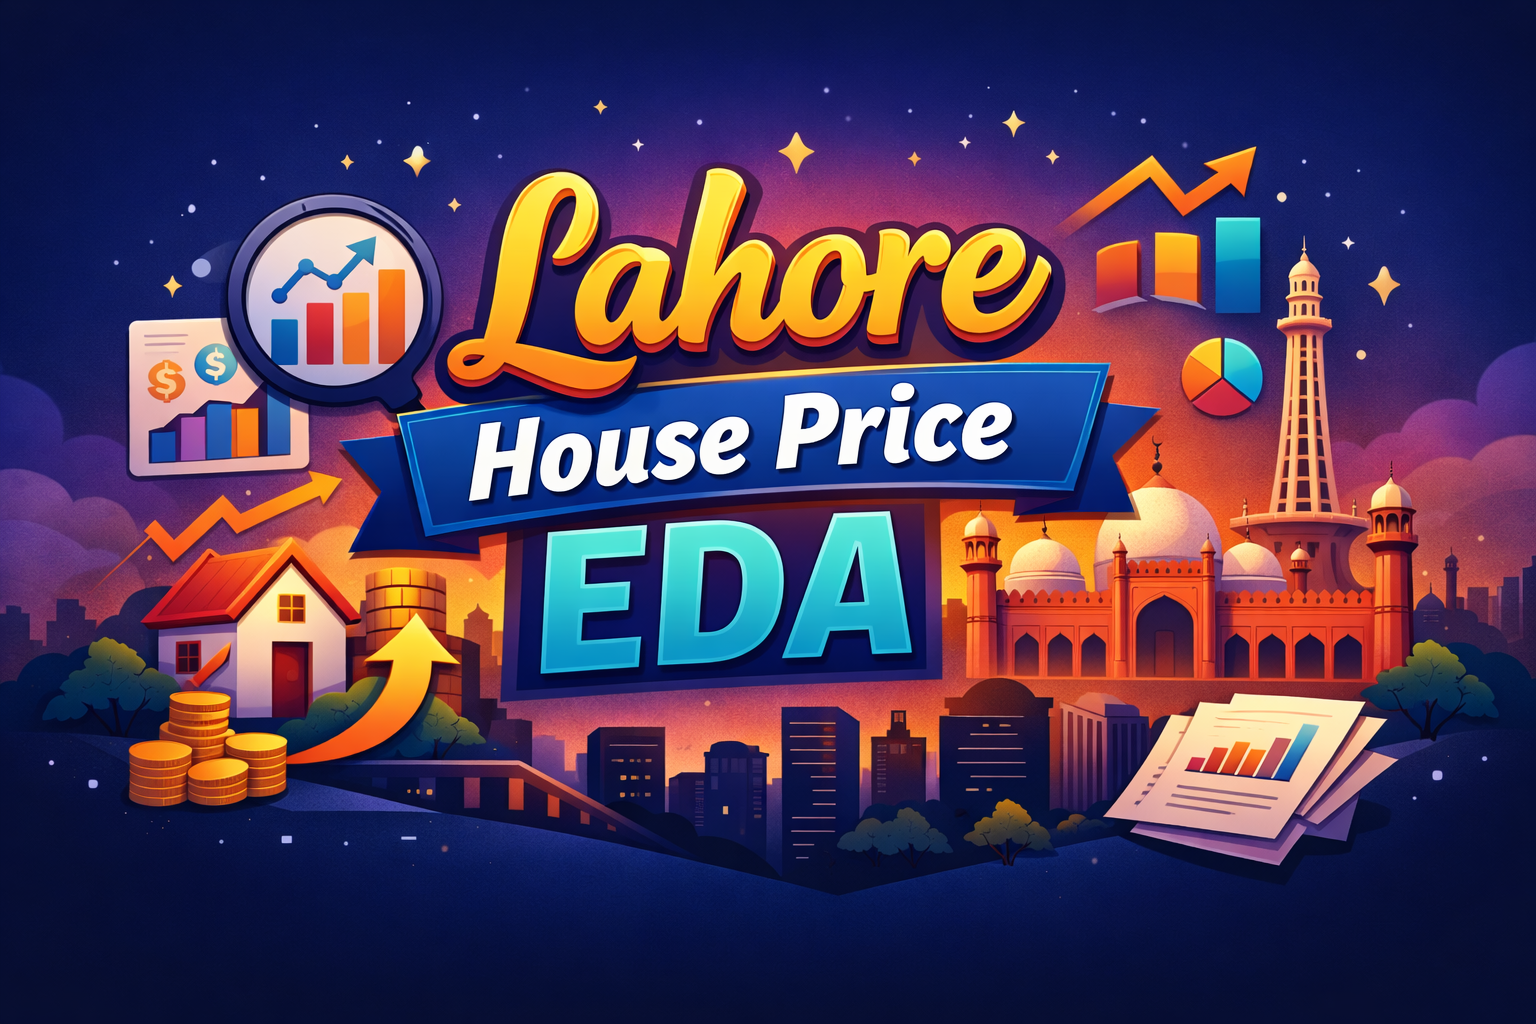

In [1]:
from IPython.display import Image, display
display(Image(filename='/kaggle/input/house-price/house.png'))

# **🏠 Lahore House Price EDA — A Market Intelligence Report**

This notebook performs a comprehensive Exploratory Data Analysis (EDA) on a **Lahore house price dataset**.  
The goal is not just to visualize data, but to extract **actionable market insights** for investors, buyers, and developers.

---

## **📌 Dataset Overview**

The dataset contains **230 property listings** with the following features:

- **Area**: Neighborhood in Lahore  
- **Year**: Listing year  
- **Price_per_sqm_Local**: Price per square meter (local currency)  
- **Size_sqm**: House size in square meters  
- **Bedrooms**: Number of bedrooms  
- **Total_Price_Local**: Total price in local currency  

---

## **🧱 1. Dataset Structure & Quality Insights**

From `df.info()` we observe:

✅ **No missing values** → no imputation bias  
✅ **Correct data types** → suitable for modeling & analysis  
✅ **Small but clean dataset** → ideal for interpretability-focused EDA  

### **Key questions addressed:**
- Is this dataset suitable for regression modeling?  
- Are features numeric enough to avoid heavy preprocessing?  
- Is sample size enough for area-wise conclusions?

---

## **📍 2. Area-wise Market Insights (MOST IMPORTANT)**

The **Area** column is the most critical feature for understanding Lahore’s real estate landscape.

### **What we analyze:**
- 💰 Most expensive areas (average & median price per sqm)  
- 🏠 Affordable vs premium zones  
- 📊 Price dispersion per area (stable vs volatile markets)  
- 🔥 Areas with consistently high demand (more listings)

### **Key questions answered:**
- Which areas are overpriced?  
- Which areas provide the best value for money?  
- Are some areas risky due to high price variance?

---

## **📅 3. Year-wise Price Trend Analysis**

Using the **Year** column, we identify market cycles and appreciation trends.

### **What we analyze:**
- 📈 Property appreciation trends over time  
- 📉 Any stagnation or dips in specific years  
- 🕰️ Market cycles (boom vs slow years)

### **Key questions answered:**
- How fast is Lahore real estate appreciating?  
- Is price growth linear or exponential?  
- Which years were best for buying vs selling?

---

## **📐 4. Size vs Price Behavior (Buyer Psychology)**

Using **Size_sqm**, we evaluate how property size impacts price behavior.

### **What we analyze:**
- 📏 Does price per sqm decrease for larger houses?  
- 🏡 Are small houses overpriced relative to size?  
- 📊 Size ranges with highest demand

### **Key insight:**
> Bigger houses don’t always mean better value per sqm.

---

## **🛏️ 5. Bedrooms vs Value Analysis**

Using **Bedrooms**, we explore the relationship between house layout and price.

### **What we analyze:**
- Price jump per additional bedroom  
- Overpricing of high-bedroom houses  
- Typical bedroom count per area  

### **Key questions answered:**
- Are 3-bed houses the sweet spot?  
- Do extra bedrooms justify higher prices?

---

## **💸 6. Total Price vs Price per sqm Consistency**

Using **Total_Price_Local**, we validate pricing logic:

### **What we analyze:**
- Total_Price ≈ Size × Price_per_sqm  
- Outliers where price is unjustified  
- Suspicious listings (potential data errors)

---

## **🚨 7. Outlier Detection (Hidden Stories)**

Outliers reveal market anomalies and data issues.

### **What we analyze:**
- Extremely overpriced properties  
- Luxury outliers vs data noise  
- Areas causing most price anomalies  

### **Key question:**
- Should median be preferred over mean?

---

## **🔗 8. Feature Relationships & Correlation**

Correlation helps identify dominant price drivers.

### **What we analyze:**
- Size vs Total Price → strong relationship  
- Bedrooms vs Size → layout trends  
- Year vs Price → inflation effect  

### **Use case:**
- Feature selection for ML models  
- Understanding dominant price drivers

---

## **🧮 9. Price Efficiency & Value Metrics (Advanced EDA)**

We engineer new metrics to measure affordability and value:

- Price per bedroom  
- Price per sqm per year  
- Area-wise affordability index  

This transforms the analysis from basic to professional.

---

## **🎯 10. Actionable Stakeholder Insights**

The final section provides decision-grade insights:

### **🧑‍💼 Investors:**
Where should I invest?

### **🏡 Buyers:**
Which areas are affordable but growing?

### **🏗️ Developers:**
What size & bedroom count sells best?

---

> **This notebook is designed to be a complete market intelligence report for Lahore real estate — from data quality checks to investment recommendations.**


# **🏠 Lahore House Price EDA — Market Insights & Trends**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/lahore-housing-prices/lahore_housing_prices.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Area                 230 non-null    object
 1   Year                 230 non-null    int64 
 2   Price_per_sqm_Local  230 non-null    int64 
 3   Size_sqm             230 non-null    int64 
 4   Bedrooms             230 non-null    int64 
 5   Total_Price_Local    230 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 10.9+ KB


# **🧱 1. Dataset Structure & Quality Insights**

### **🧱 1️⃣ Missing Values Check (Visual Proof of Data Quality)**
Even though df.info() shows no missing values, this plot proves it visually (very important for EDA credibility).

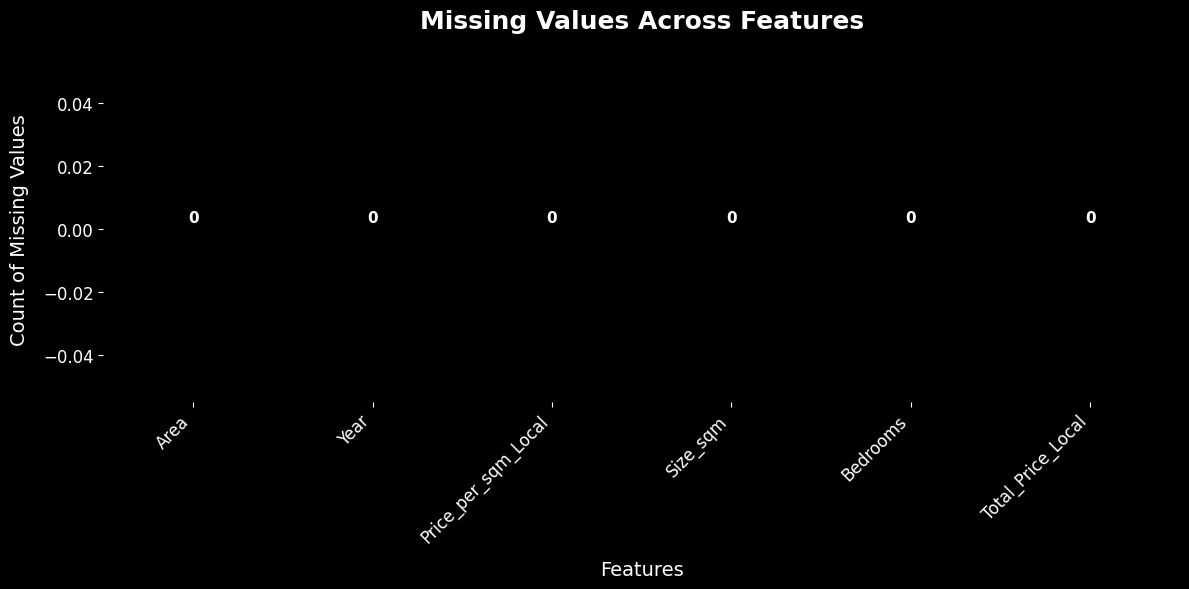

In [5]:
# ----------------------------
# Data Preparation
# ----------------------------
missing_counts = df.isnull().sum().reset_index()
missing_counts.columns = ["Feature", "Missing_Values"]
missing_counts = missing_counts.sort_values(by="Missing_Values", ascending=False)

# ----------------------------
# Plot Styling
# ----------------------------
plt.style.use("dark_background")

# Custom color palette
palette = sns.color_palette("viridis", len(missing_counts))

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=missing_counts,
    x="Feature",
    y="Missing_Values",
    palette=palette
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Missing Values Across Features", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Features", fontsize=14, labelpad=10)
plt.ylabel("Count of Missing Values", fontsize=14, labelpad=10)

# ----------------------------
# Rotate labels for readability
# ----------------------------
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# ----------------------------
# Add text labels on bars
# ----------------------------
for p in bar.patches:
    bar.annotate(
        format(int(p.get_height()), ","),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
        fontsize=11,
        color="white",
        fontweight="bold"
    )

# ----------------------------
# Make plot cleaner
# ----------------------------
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🧱 2️⃣ Data Type Distribution (Model Readiness Check)**
This shows whether your dataset is numerically suitable for regression models.

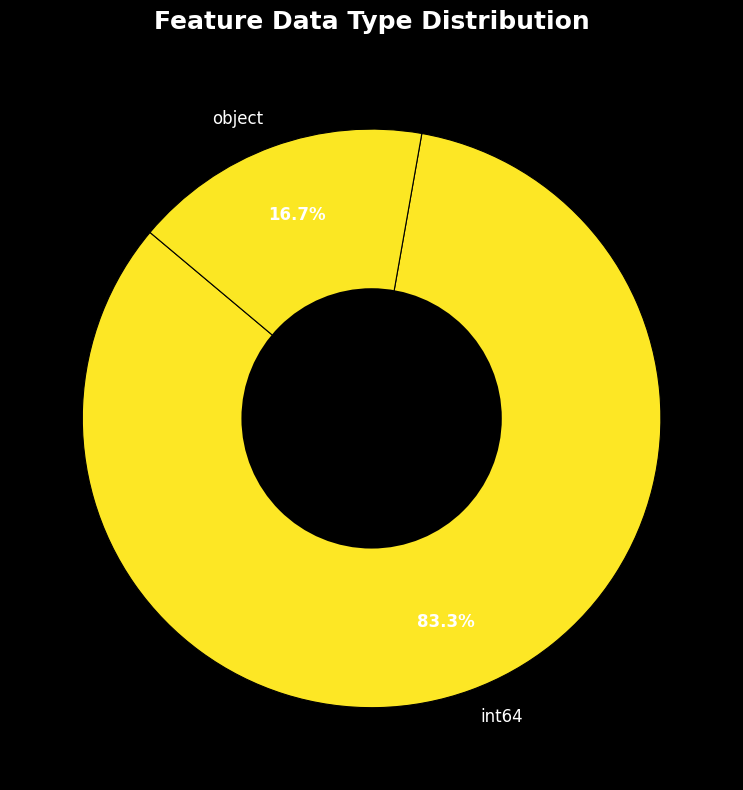

In [6]:
# ----------------------------
# Data Preparation
# ----------------------------
dtype_counts = (
    df.dtypes
      .astype(str)
      .value_counts()
      .reset_index()
)
dtype_counts.columns = ["Data_Type", "Count"]

# ----------------------------
# Plot Styling
# ----------------------------
plt.style.use("dark_background")

# Color palette
colors = plt.cm.viridis_r(range(len(dtype_counts)))

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    dtype_counts["Count"],
    labels=dtype_counts["Data_Type"],
    autopct="%1.1f%%",
    startangle=140,
    pctdistance=0.75,
    colors=colors,
    wedgeprops={"edgecolor": "black", "linewidth": 0.8}
)

# ----------------------------
# Add donut hole
# ----------------------------
centre_circle = plt.Circle((0, 0), 0.45, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# ----------------------------
# Title
# ----------------------------
plt.title("Feature Data Type Distribution", fontsize=18, fontweight="bold", pad=20)

# ----------------------------
# Text Styling
# ----------------------------
for text in texts:
    text.set_color("white")
    text.set_fontsize(12)

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(12)
    autotext.set_fontweight("bold")

# ----------------------------
# Final Layout
# ----------------------------
plt.tight_layout()
plt.show()

### **🧱 3️⃣ Sample Size Adequacy (Overall Dataset Size)**

A clean visual to justify whether 230 samples are enough.

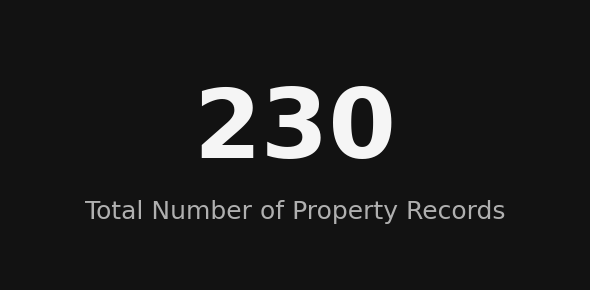

In [7]:
# ----------------------------
# Total Records
# ----------------------------
total_records = df.shape[0]

# ----------------------------
# Plot Styling
# ----------------------------
plt.style.use("dark_background")

fig, ax = plt.subplots(figsize=(6, 3), facecolor="#121212")
ax.set_facecolor("#121212")

# ----------------------------
# Main Number
# ----------------------------
ax.text(
    0.5, 0.55,
    f"{total_records:,}",
    fontsize=70,
    fontweight="bold",
    color="#F5F5F5",
    ha="center",
    va="center"
)

# ----------------------------
# Title
# ----------------------------
ax.text(
    0.5, 0.25,
    "Total Number of Property Records",
    fontsize=18,
    color="#B0B0B0",
    ha="center",
    va="center"
)

# ----------------------------
# Remove axes
# ----------------------------
ax.axis("off")

# ----------------------------
# Add subtle border
# ----------------------------
for spine in ax.spines.values():
    spine.set_edgecolor("#2C2C2C")
    spine.set_linewidth(2)

plt.tight_layout()
plt.show()

### **🧱 4️⃣ Area-wise Sample Distribution (EDA Reliability Check)**

This is CRITICAL to justify area-wise insights.

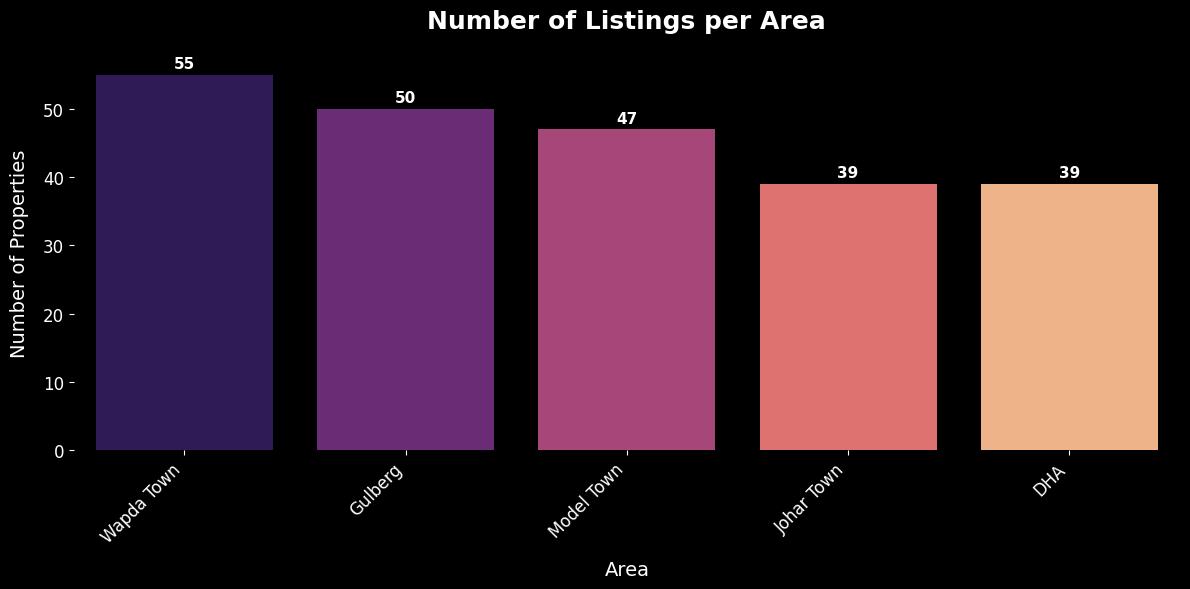

In [8]:
# ----------------------------
# Data Preparation
# ----------------------------
area_counts = df["Area"].value_counts().reset_index()
area_counts.columns = ["Area", "Listings"]
area_counts = area_counts.sort_values("Listings", ascending=False)

# ----------------------------
# Plot Styling
# ----------------------------
plt.style.use("dark_background")

# Color palette
palette = sns.color_palette("magma", len(area_counts))

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=area_counts,
    x="Area",
    y="Listings",
    palette=palette
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Number of Listings per Area", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Area", fontsize=14, labelpad=10)
plt.ylabel("Number of Properties", fontsize=14, labelpad=10)

# ----------------------------
# Rotate labels
# ----------------------------
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# ----------------------------
# Add values on bars
# ----------------------------
for p in bar.patches:
    bar.annotate(
        format(int(p.get_height()), ","),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
        fontsize=11,
        color="white",
        fontweight="bold"
    )

# ----------------------------
# Remove spines
# ----------------------------
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🧱 5️⃣ Feature Count Summary (EDA Simplicity Indicator)**

Shows dataset simplicity & interpretability.

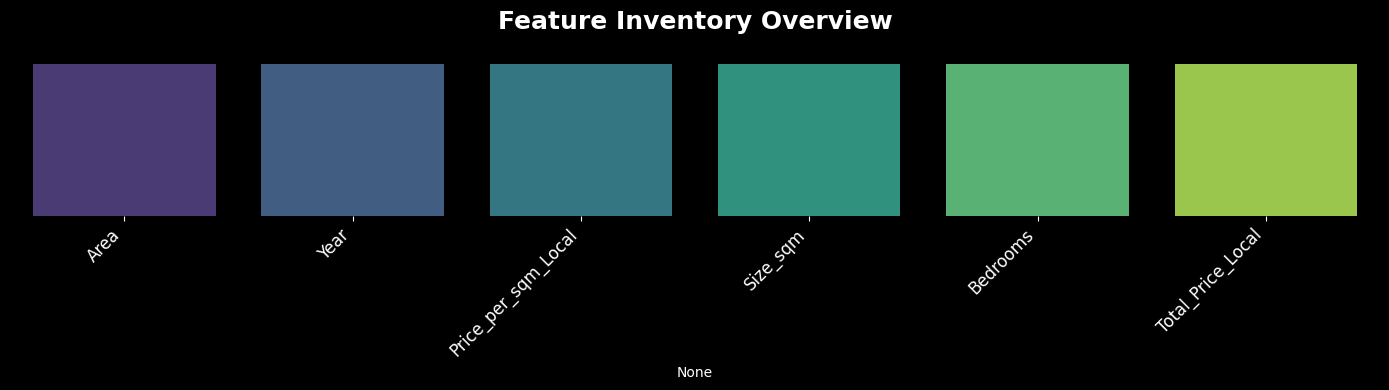

In [9]:
# ----------------------------
# Data Preparation
# ----------------------------
features = df.columns
presence = [1] * len(features)

# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(14, 4))

# Create a dark-themed color palette
colors = sns.color_palette("viridis", len(features))

# ----------------------------
# Plot
# ----------------------------
bar = sns.barplot(
    x=features,
    y=presence,
    palette=colors
)

# ----------------------------
# Title
# ----------------------------
plt.title("Feature Inventory Overview", fontsize=18, fontweight="bold", pad=20)

# ----------------------------
# Remove y-axis
# ----------------------------
plt.yticks([])

# ----------------------------
# Rotate labels for readability
# ----------------------------
plt.xticks(rotation=45, ha="right", fontsize=12)

# ----------------------------
# Remove spines for clean look
# ----------------------------
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# **📍 2. Area-wise Market Insights**

### **💰 1. Average Price per sqm by Area (Premium Zones)**

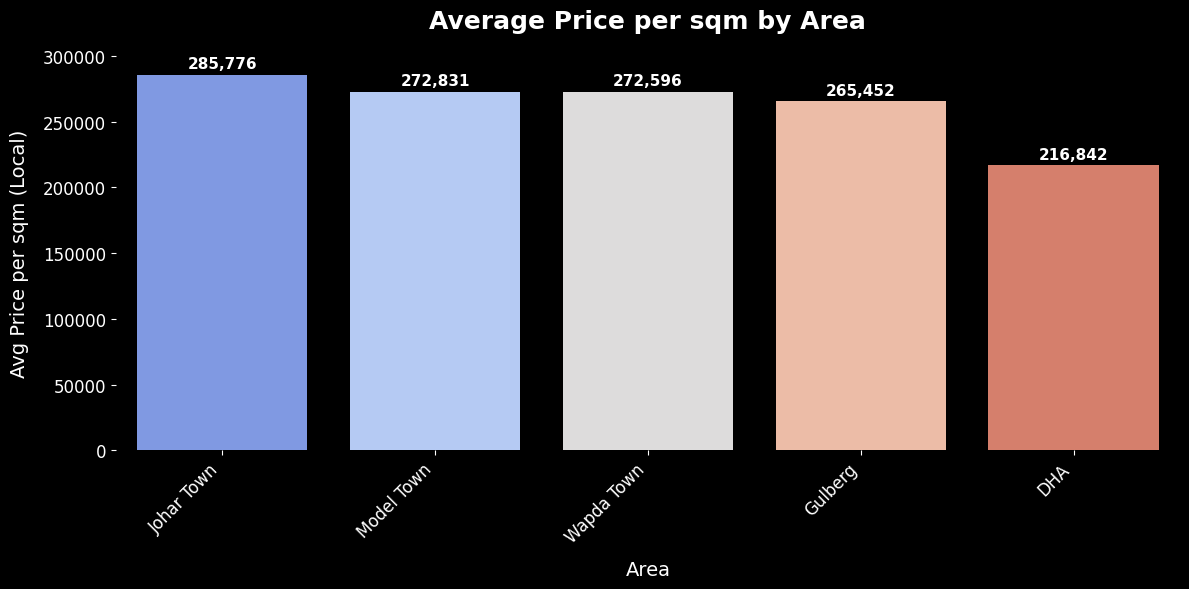

In [10]:
# ----------------------------
# Data Preparation
# ----------------------------
area_avg_price = (
    df.groupby("Area")["Price_per_sqm_Local"]
      .mean()
      .reset_index()
      .sort_values(by="Price_per_sqm_Local", ascending=False)
)

# ----------------------------
# Plot Styling
# ----------------------------
plt.style.use("dark_background")

# Color palette
palette = sns.color_palette("coolwarm", len(area_avg_price))

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=area_avg_price,
    x="Area",
    y="Price_per_sqm_Local",
    palette=palette
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Average Price per sqm by Area", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Area", fontsize=14, labelpad=10)
plt.ylabel("Avg Price per sqm (Local)", fontsize=14, labelpad=10)

# ----------------------------
# Rotate labels
# ----------------------------
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# ----------------------------
# Add values on bars
# ----------------------------
for p in bar.patches:
    bar.annotate(
        f"{p.get_height():,.0f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
        fontsize=11,
        color="white",
        fontweight="bold"
    )

# ----------------------------
# Remove spines
# ----------------------------
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **💰 2. Median Price per sqm (Outlier-Resistant View)**

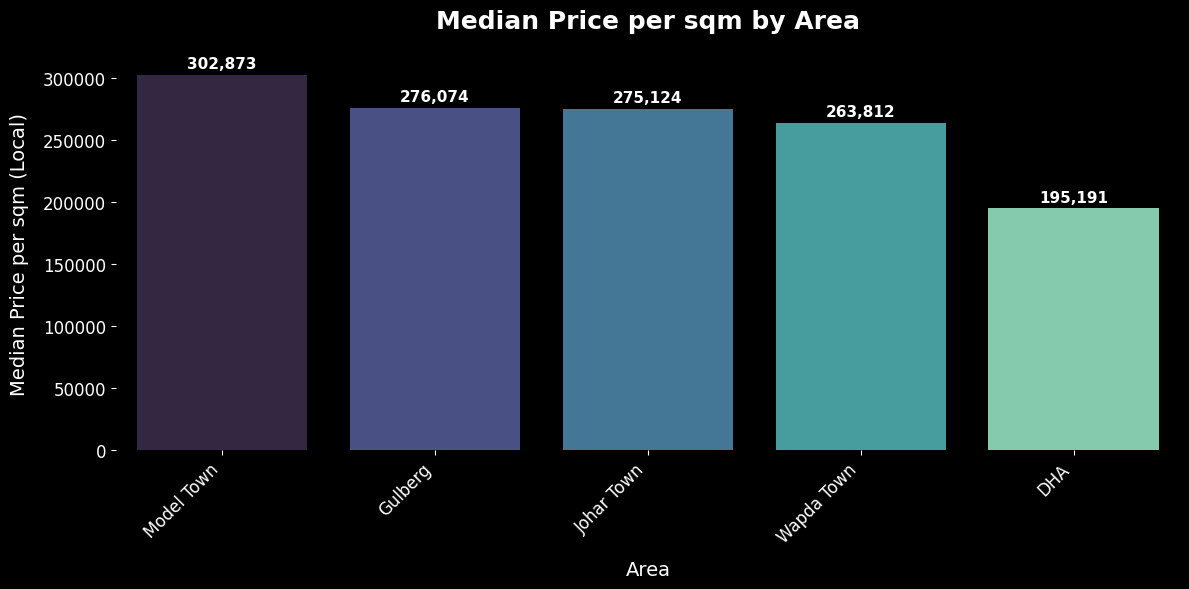

In [11]:
# ----------------------------
# Data Preparation
# ----------------------------
area_median_price = (
    df.groupby("Area")["Price_per_sqm_Local"]
      .median()
      .reset_index()
      .sort_values(by="Price_per_sqm_Local", ascending=False)
)

# ----------------------------
# Plot Styling
# ----------------------------
plt.style.use("dark_background")

# Color palette
palette = sns.color_palette("mako", len(area_median_price))

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=area_median_price,
    x="Area",
    y="Price_per_sqm_Local",
    palette=palette
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Median Price per sqm by Area", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Area", fontsize=14, labelpad=10)
plt.ylabel("Median Price per sqm (Local)", fontsize=14, labelpad=10)

# ----------------------------
# Rotate labels
# ----------------------------
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# ----------------------------
# Add values on bars
# ----------------------------
for p in bar.patches:
    bar.annotate(
        f"{p.get_height():,.0f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
        fontsize=11,
        color="white",
        fontweight="bold"
    )

# ----------------------------
# Remove spines
# ----------------------------
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🏠 3. Affordable vs Premium Areas (Value Comparison)**

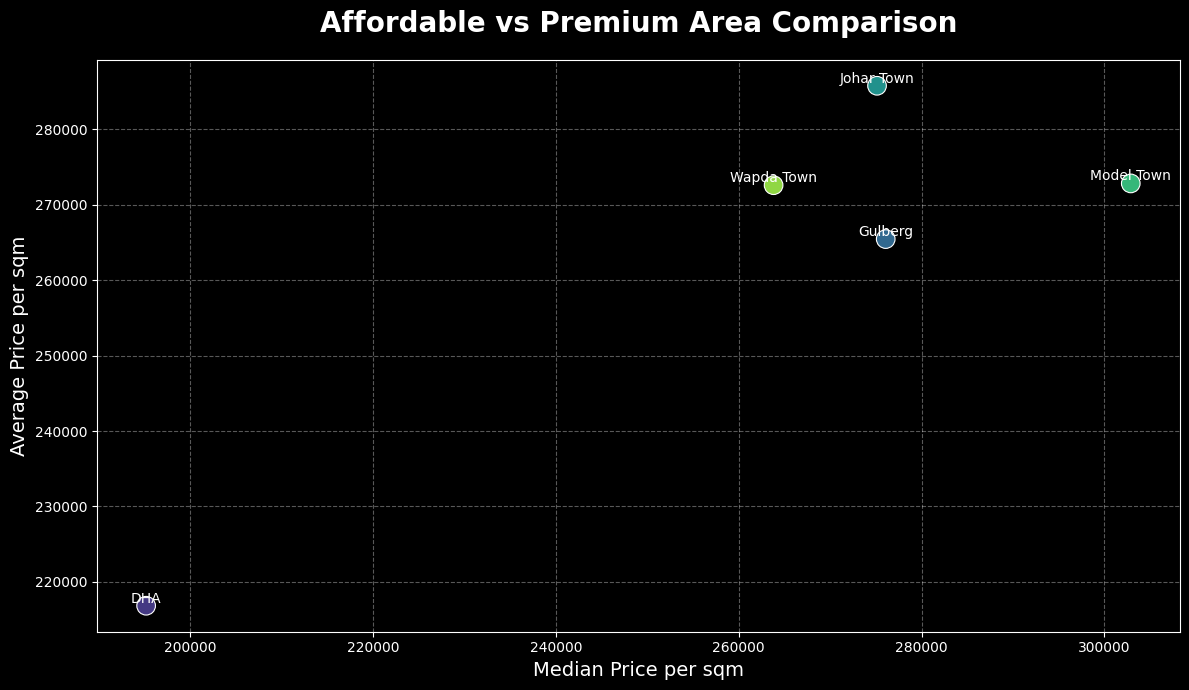

In [12]:
# ----------------------------
# Data Preparation
# ----------------------------
area_price_compare = (
    df.groupby("Area")["Price_per_sqm_Local"]
      .agg(["mean", "median"])
      .reset_index()
)

# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Color palette
colors = sns.color_palette("viridis", len(area_price_compare))

# ----------------------------
# Scatter Plot
# ----------------------------
plt.scatter(
    x=area_price_compare["median"],
    y=area_price_compare["mean"],
    s=180,
    c=colors,
    edgecolors="white",
    linewidth=0.8
)

# ----------------------------
# Text Labels (Area names)
# ----------------------------
for i, row in area_price_compare.iterrows():
    plt.text(
        row["median"],
        row["mean"] + 0.2,  # slight offset
        row["Area"],
        fontsize=10,
        color="white",
        ha="center",
        va="bottom"
    )

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Affordable vs Premium Area Comparison", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Median Price per sqm", fontsize=14)
plt.ylabel("Average Price per sqm", fontsize=14)

# ----------------------------
# Grid and layout
# ----------------------------
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

### **📊 4. Price Dispersion by Area (Market Stability)**

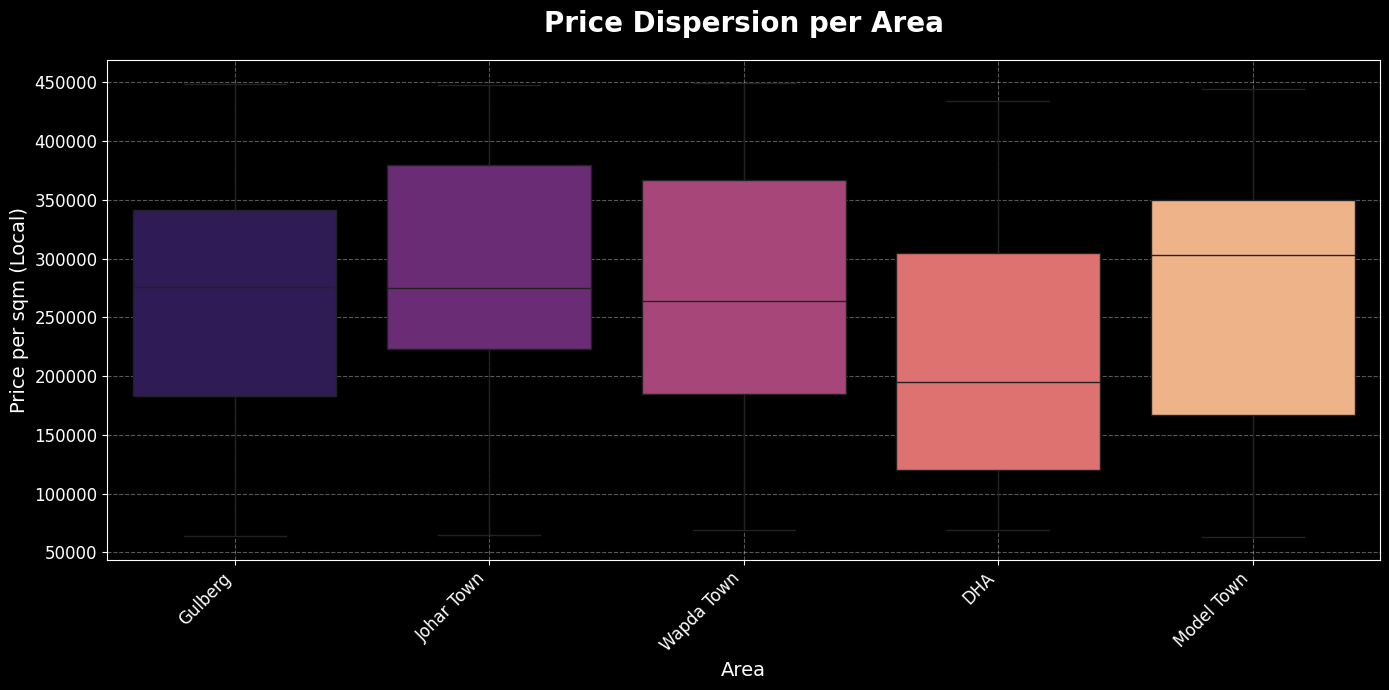

In [13]:
# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(14, 7))

# ----------------------------
# Box Plot
# ----------------------------
sns.boxplot(
    data=df,
    x="Area",
    y="Price_per_sqm_Local",
    palette="magma",
    showfliers=False  # cleaner look
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Price Dispersion per Area", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Area", fontsize=14)
plt.ylabel("Price per sqm (Local)", fontsize=14)

# ----------------------------
# Rotate labels
# ----------------------------
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# ----------------------------
# Grid
# ----------------------------
plt.grid(True, linestyle="--", alpha=0.35)

plt.tight_layout()
plt.show()

### **🔥 5. Area-wise Demand (Number of Listings)**

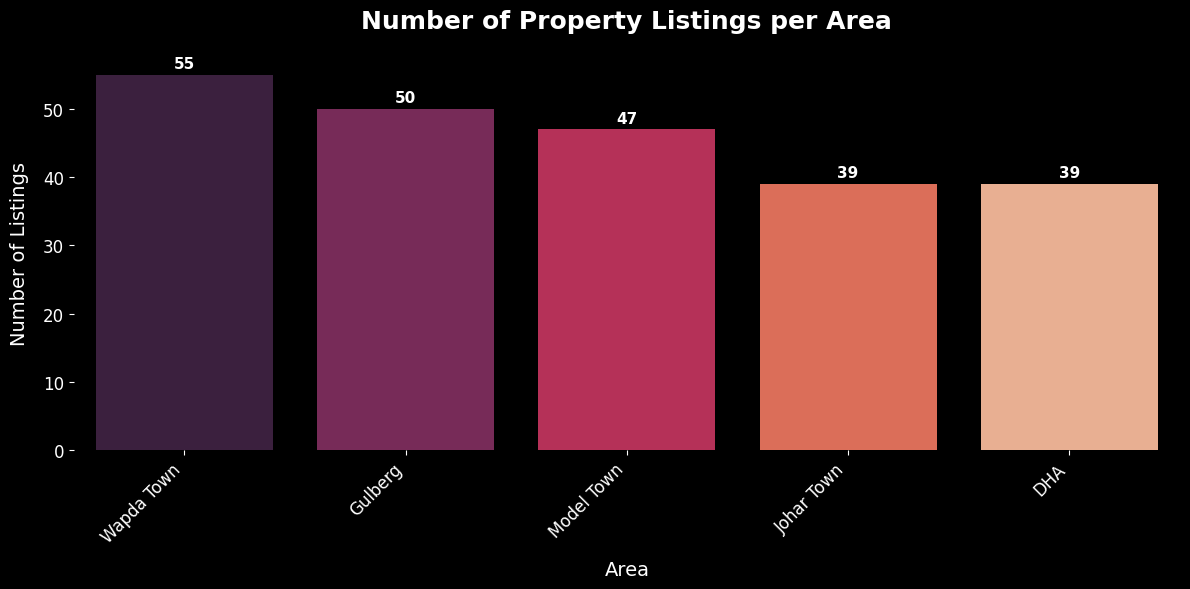

In [14]:
# ----------------------------
# Data Preparation
# ----------------------------
area_demand = (
    df["Area"]
      .value_counts()
      .reset_index()
)

area_demand.columns = ["Area", "Listings"]
area_demand = area_demand.sort_values("Listings", ascending=False)

# ----------------------------
# Plot Styling
# ----------------------------
plt.style.use("dark_background")

# Color palette
palette = sns.color_palette("rocket", len(area_demand))

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=area_demand,
    x="Area",
    y="Listings",
    palette=palette
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Number of Property Listings per Area", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Area", fontsize=14, labelpad=10)
plt.ylabel("Number of Listings", fontsize=14, labelpad=10)

# ----------------------------
# Rotate labels
# ----------------------------
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)

# ----------------------------
# Add values on bars
# ----------------------------
for p in bar.patches:
    bar.annotate(
        f"{int(p.get_height()):,}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
        fontsize=11,
        color="white",
        fontweight="bold"
    )

# ----------------------------
# Remove spines
# ----------------------------
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🚨 6. Risk Map: High Price + High Variance Areas**

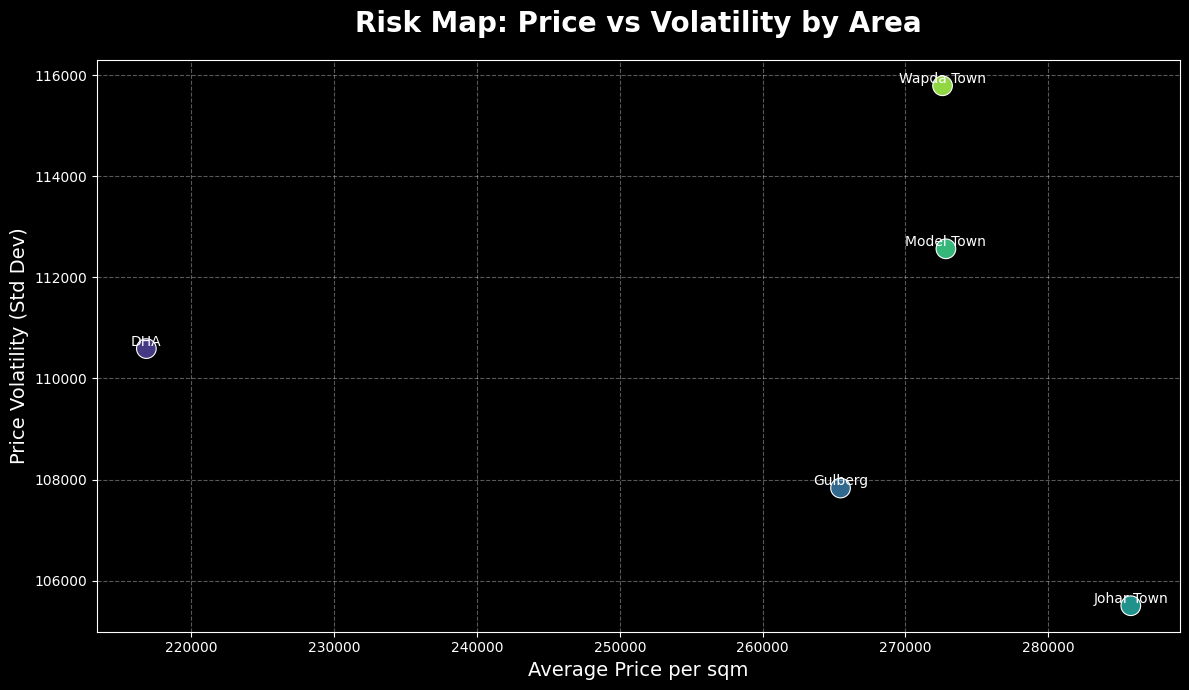

In [15]:
# ----------------------------
# Data Preparation
# ----------------------------
area_risk = (
    df.groupby("Area")["Price_per_sqm_Local"]
      .agg(["mean", "std"])
      .reset_index()
)

# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Color palette
colors = sns.color_palette("viridis", len(area_risk))

# ----------------------------
# Scatter Plot
# ----------------------------
plt.scatter(
    x=area_risk["mean"],
    y=area_risk["std"],
    s=200,
    c=colors,
    edgecolors="white",
    linewidth=0.8
)

# ----------------------------
# Text Labels (Area names)
# ----------------------------
for i, row in area_risk.iterrows():
    plt.text(
        row["mean"],
        row["std"] + 0.02,  # slight offset
        row["Area"],
        fontsize=10,
        color="white",
        ha="center",
        va="bottom"
    )

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Risk Map: Price vs Volatility by Area", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Average Price per sqm", fontsize=14)
plt.ylabel("Price Volatility (Std Dev)", fontsize=14)

# ----------------------------
# Grid and layout
# ----------------------------
plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

# **📅 3. Year-wise Price Trend Analysis**

### **📈 1. Average Price per sqm Over Time (Market Appreciation)**

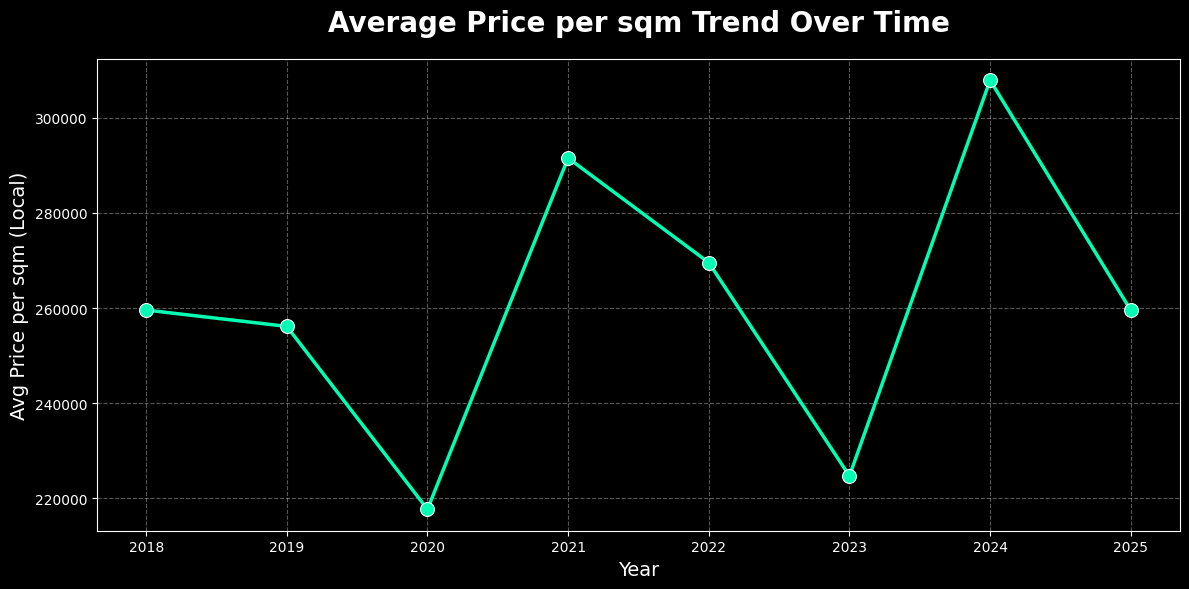

In [16]:
# ----------------------------
# Data Preparation
# ----------------------------
year_avg_price = (
    df.groupby("Year")["Price_per_sqm_Local"]
      .mean()
      .reset_index()
)

# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

# ----------------------------
# Line Plot
# ----------------------------
sns.lineplot(
    data=year_avg_price,
    x="Year",
    y="Price_per_sqm_Local",
    marker="o",
    linewidth=2.5,
    markersize=10,
    color="#00FFB2"  # neon-ish green for visibility
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Average Price per sqm Trend Over Time", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Avg Price per sqm (Local)", fontsize=14)

# ----------------------------
# Grid
# ----------------------------
plt.grid(True, linestyle="--", alpha=0.35)

plt.tight_layout()
plt.show()

### **📉 2. Year-wise Median Price (Outlier-Resistant Trend)**

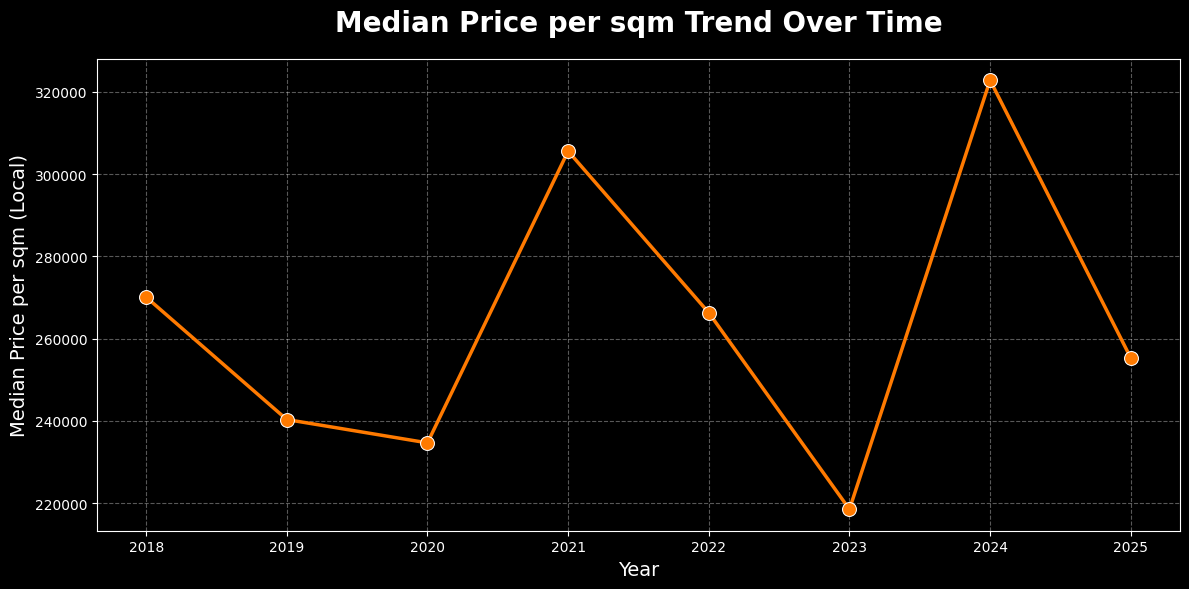

In [17]:
# ----------------------------
# Data Preparation
# ----------------------------
year_median_price = (
    df.groupby("Year")["Price_per_sqm_Local"]
      .median()
      .reset_index()
)

# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

# ----------------------------
# Line Plot
# ----------------------------
sns.lineplot(
    data=year_median_price,
    x="Year",
    y="Price_per_sqm_Local",
    marker="o",
    linewidth=2.5,
    markersize=10,
    color="#FF7A00"  # bright orange for visibility
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Median Price per sqm Trend Over Time", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Median Price per sqm (Local)", fontsize=14)

# ----------------------------
# Grid
# ----------------------------
plt.grid(True, linestyle="--", alpha=0.35)

plt.tight_layout()
plt.show()

### **🕰️ 3. Market Volatility Over Time (Boom vs Slow Years)**

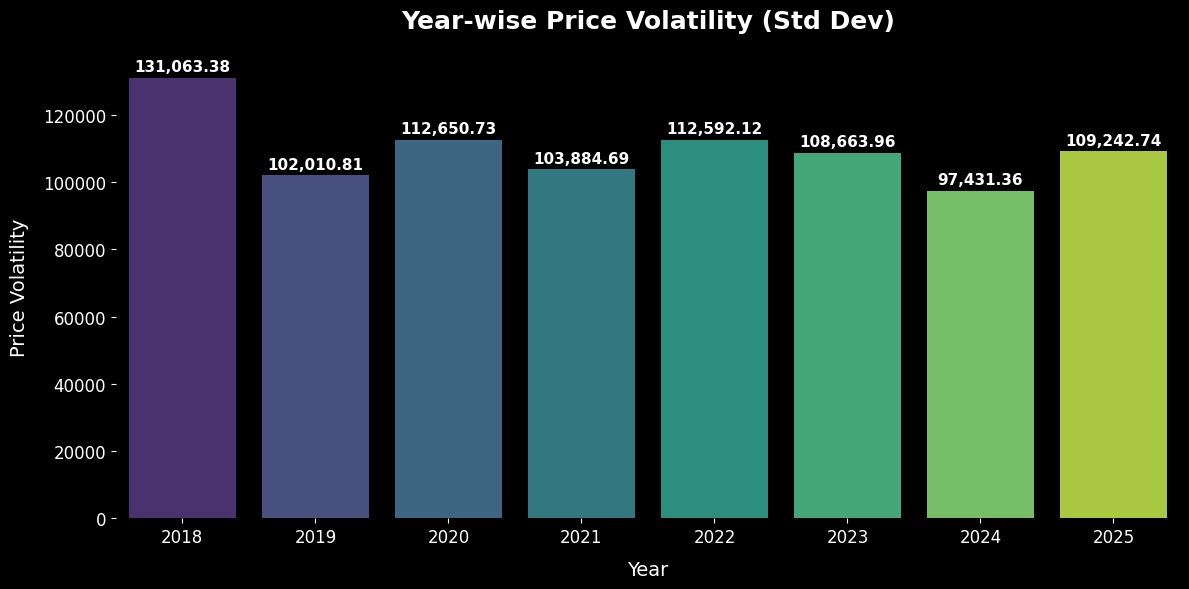

In [18]:
# ----------------------------
# Data Preparation
# ----------------------------
year_volatility = (
    df.groupby("Year")["Price_per_sqm_Local"]
      .std()
      .reset_index()
)

# ----------------------------
# Plot Styling
# ----------------------------
plt.style.use("dark_background")

# Color palette
palette = sns.color_palette("viridis", len(year_volatility))

# ----------------------------
# Plot
# ----------------------------
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=year_volatility,
    x="Year",
    y="Price_per_sqm_Local",
    palette=palette
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Year-wise Price Volatility (Std Dev)", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Price Volatility", fontsize=14, labelpad=10)

# ----------------------------
# Rotate labels
# ----------------------------
plt.xticks(rotation=0, ha="center", fontsize=12)
plt.yticks(fontsize=12)

# ----------------------------
# Add values on bars
# ----------------------------
for p in bar.patches:
    bar.annotate(
        f"{p.get_height():,.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
        fontsize=11,
        color="white",
        fontweight="bold"
    )

# ----------------------------
# Remove spines
# ----------------------------
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **📊 4. Distribution of Prices by Year (Market Depth)**

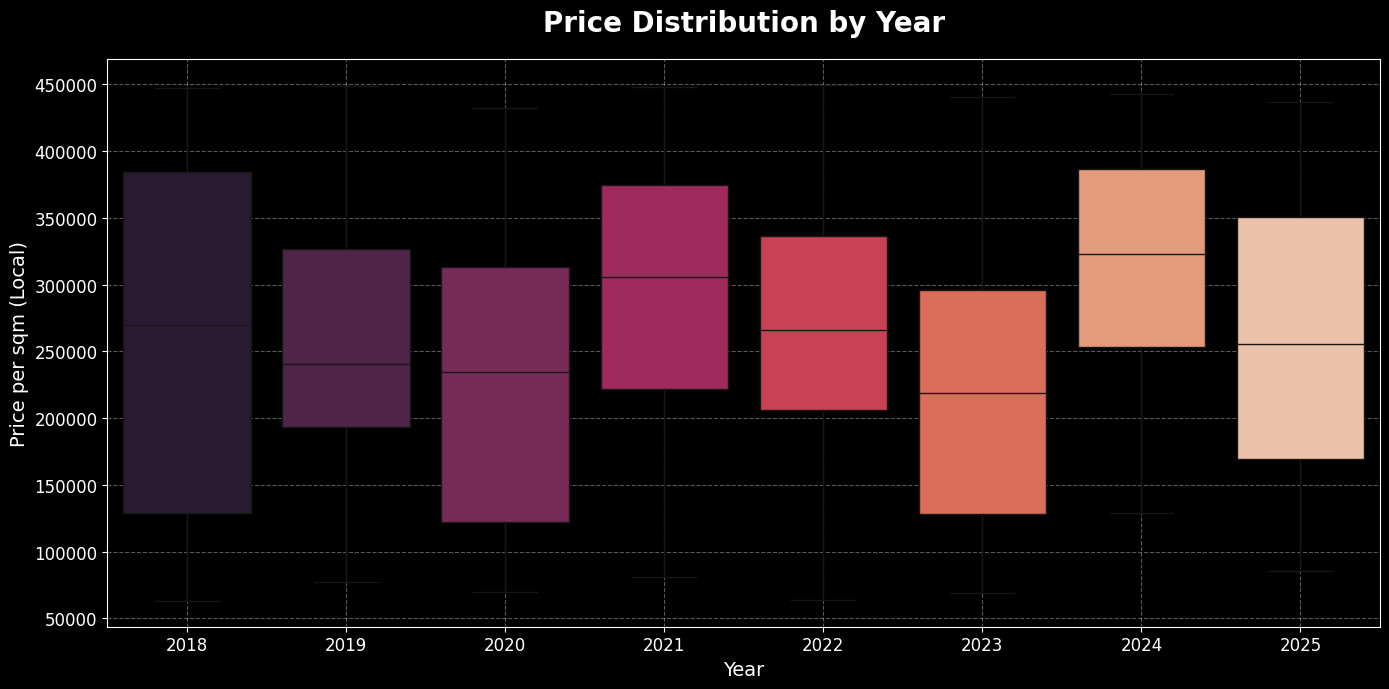

In [19]:
# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(14, 7))

# ----------------------------
# Box Plot
# ----------------------------
sns.boxplot(
    data=df,
    x="Year",
    y="Price_per_sqm_Local",
    palette="rocket",
    showfliers=False  # cleaner look
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Price Distribution by Year", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price per sqm (Local)", fontsize=14)

# ----------------------------
# Rotate labels
# ----------------------------
plt.xticks(rotation=0, ha="center", fontsize=12)
plt.yticks(fontsize=12)

# ----------------------------
# Grid
# ----------------------------
plt.grid(True, linestyle="--", alpha=0.35)

plt.tight_layout()
plt.show()

### **🚀 5. Growth Rate Estimation (Linear vs Exponential Feel)**

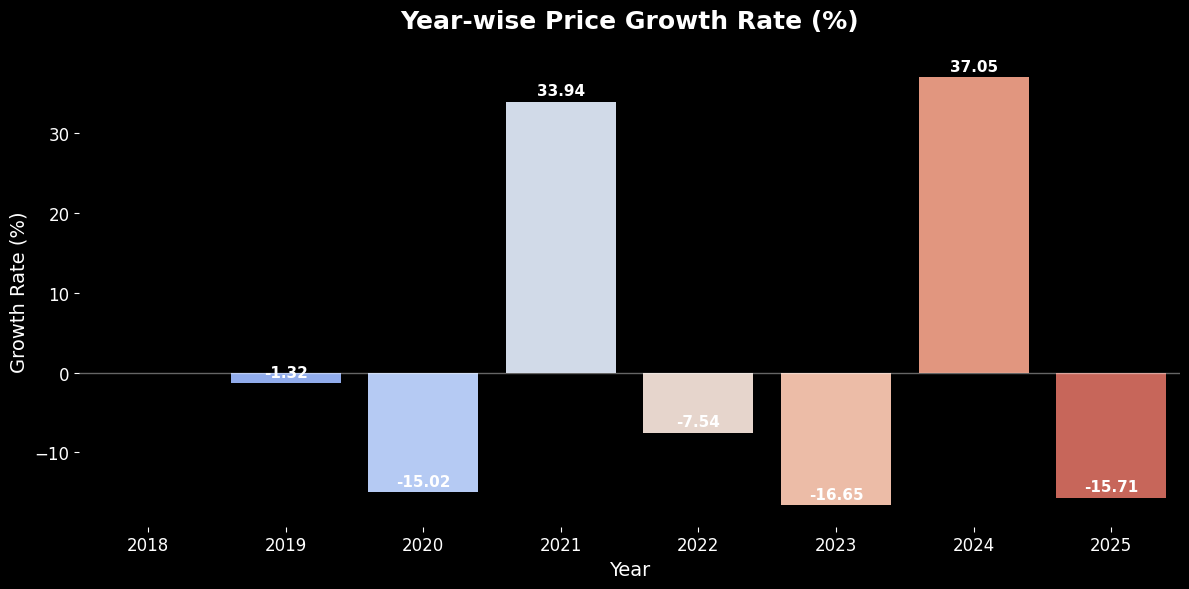

In [20]:
# ----------------------------
# Data Preparation
# ----------------------------
year_growth = (
    year_avg_price
    .assign(Growth_Rate=year_avg_price["Price_per_sqm_Local"].pct_change() * 100)
)

# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

# Color palette
palette = sns.color_palette("coolwarm", len(year_growth))

# ----------------------------
# Plot
# ----------------------------
bar = sns.barplot(
    data=year_growth,
    x="Year",
    y="Growth_Rate",
    palette=palette
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Year-wise Price Growth Rate (%)", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Growth Rate (%)", fontsize=14)

# ----------------------------
# Rotate labels
# ----------------------------
plt.xticks(rotation=0, ha="center", fontsize=12)
plt.yticks(fontsize=12)

# ----------------------------
# Add values on bars
# ----------------------------
for p in bar.patches:
    bar.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
        fontsize=11,
        color="white",
        fontweight="bold"
    )

# ----------------------------
# Add horizontal line at 0
# ----------------------------
plt.axhline(0, color="white", linewidth=1, alpha=0.4)

# ----------------------------
# Remove spines
# ----------------------------
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# **📐 4. Size vs Price Behavior (Buyer Psychology)**

### **📏 1. Size vs Price per sqm (Value Curve)**

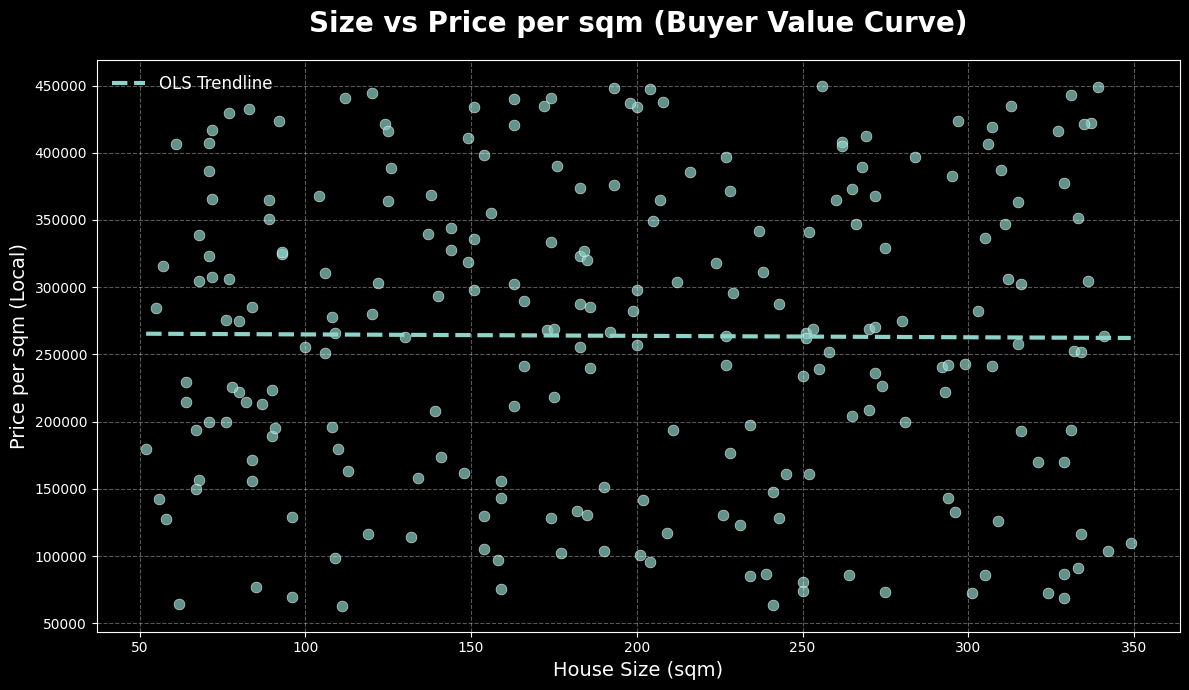

In [21]:
# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# ----------------------------
# Scatter Plot
# ----------------------------
sns.scatterplot(
    data=df,
    x="Size_sqm",
    y="Price_per_sqm_Local",
    alpha=0.7,
    s=60,
    edgecolor="white",
    linewidth=0.5
)

# ----------------------------
# Trendline (OLS)
# ----------------------------
X = df["Size_sqm"].values.reshape(-1, 1)
y = df["Price_per_sqm_Local"].values

model = LinearRegression()
model.fit(X, y)

x_range = np.linspace(df["Size_sqm"].min(), df["Size_sqm"].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

plt.plot(
    x_range,
    y_pred,
    linewidth=3,
    linestyle="--",
    label="OLS Trendline"
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Size vs Price per sqm (Buyer Value Curve)", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("House Size (sqm)", fontsize=14)
plt.ylabel("Price per sqm (Local)", fontsize=14)

# ----------------------------
# Legend & Grid
# ----------------------------
plt.legend(frameon=False, fontsize=12)
plt.grid(True, linestyle="--", alpha=0.35)

plt.tight_layout()
plt.show()

### **🏡 2. Small vs Large Houses (Price Efficiency Bands)**

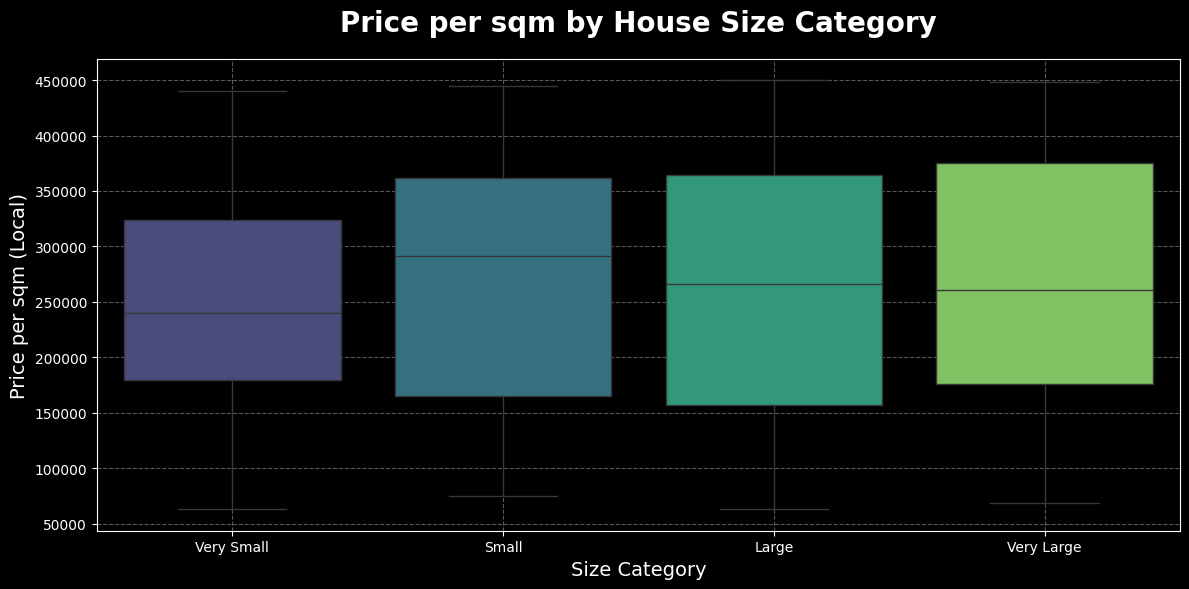

In [22]:
# Ensure the column exists
df["Size_Category"] = pd.qcut(
    df["Size_sqm"],
    q=4,
    labels=["Very Small", "Small", "Large", "Very Large"]
)

# Plot
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="Size_Category",
    y="Price_per_sqm_Local",
    palette="viridis",
    showfliers=False
)

plt.title("Price per sqm by House Size Category", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Size Category", fontsize=14)
plt.ylabel("Price per sqm (Local)", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.35)
plt.tight_layout()
plt.show()

### **📊 3. Demand by Size Range (What Buyers Prefer)**

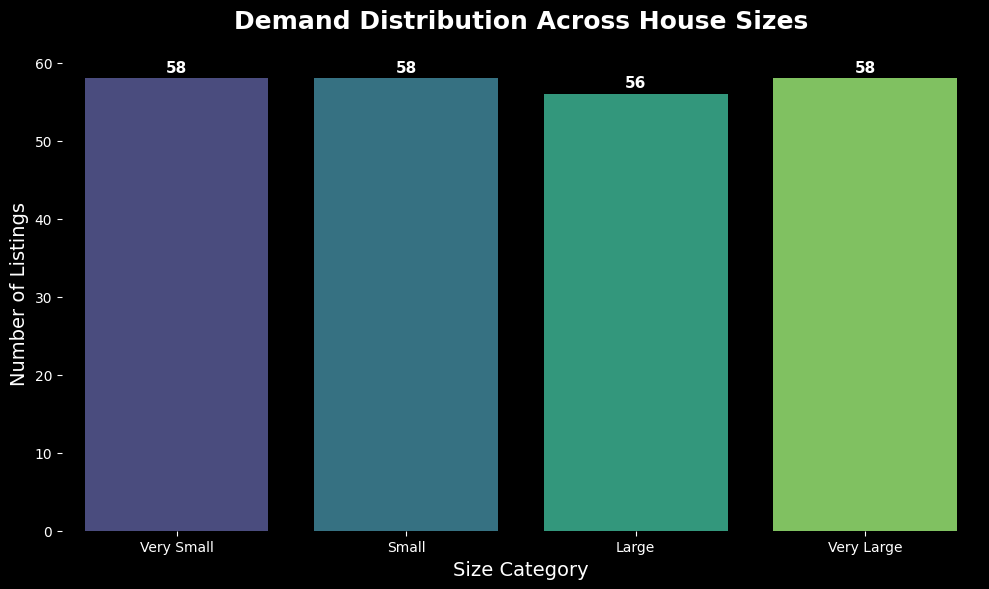

In [23]:
# ----------------------------
# Data Preparation
# ----------------------------
size_demand = (
    df.groupby("Size_Category")
      .size()
      .reset_index(name="Listings")
)

# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))

# ----------------------------
# Bar Plot
# ----------------------------
bar = sns.barplot(
    data=size_demand,
    x="Size_Category",
    y="Listings",
    palette="viridis"
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Demand Distribution Across House Sizes", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Size Category", fontsize=14)
plt.ylabel("Number of Listings", fontsize=14)

# ----------------------------
# Value labels
# ----------------------------
for p in bar.patches:
    bar.annotate(
        f"{int(p.get_height()):,}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
        fontsize=11,
        color="white",
        fontweight="bold"
    )

# ----------------------------
# Clean look
# ----------------------------
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **📉 4. Size vs Total Price (Budget Constraint Reality)**

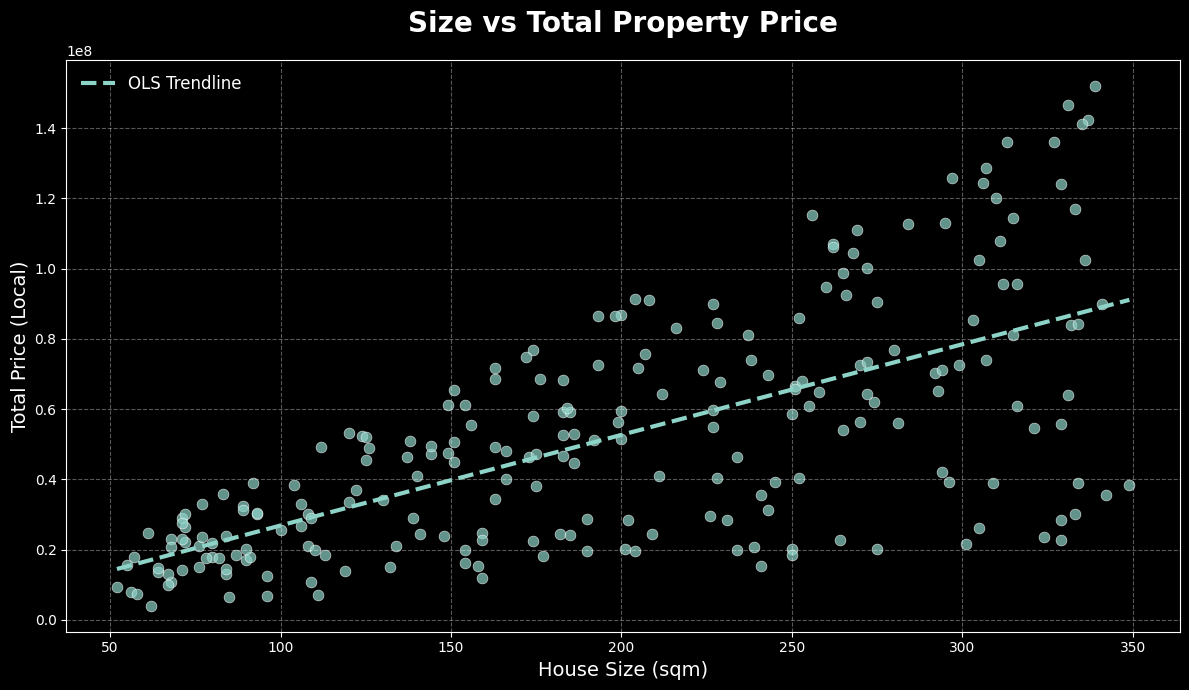

In [24]:
# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# ----------------------------
# Scatter Plot
# ----------------------------
sns.scatterplot(
    data=df,
    x="Size_sqm",
    y="Total_Price_Local",
    alpha=0.7,
    s=60,
    edgecolor="white",
    linewidth=0.5
)

# ----------------------------
# Trendline (OLS)
# ----------------------------
X = df["Size_sqm"].values.reshape(-1, 1)
y = df["Total_Price_Local"].values

model = LinearRegression()
model.fit(X, y)

x_range = np.linspace(df["Size_sqm"].min(), df["Size_sqm"].max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

plt.plot(
    x_range,
    y_pred,
    linewidth=3,
    linestyle="--",
    label="OLS Trendline"
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Size vs Total Property Price", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("House Size (sqm)", fontsize=14)
plt.ylabel("Total Price (Local)", fontsize=14)

# ----------------------------
# Legend & Grid
# ----------------------------
plt.legend(frameon=False, fontsize=12)
plt.grid(True, linestyle="--", alpha=0.35)

plt.tight_layout()
plt.show()

### **🚨 5. Overpricing Detection (Small but Expensive Houses)**

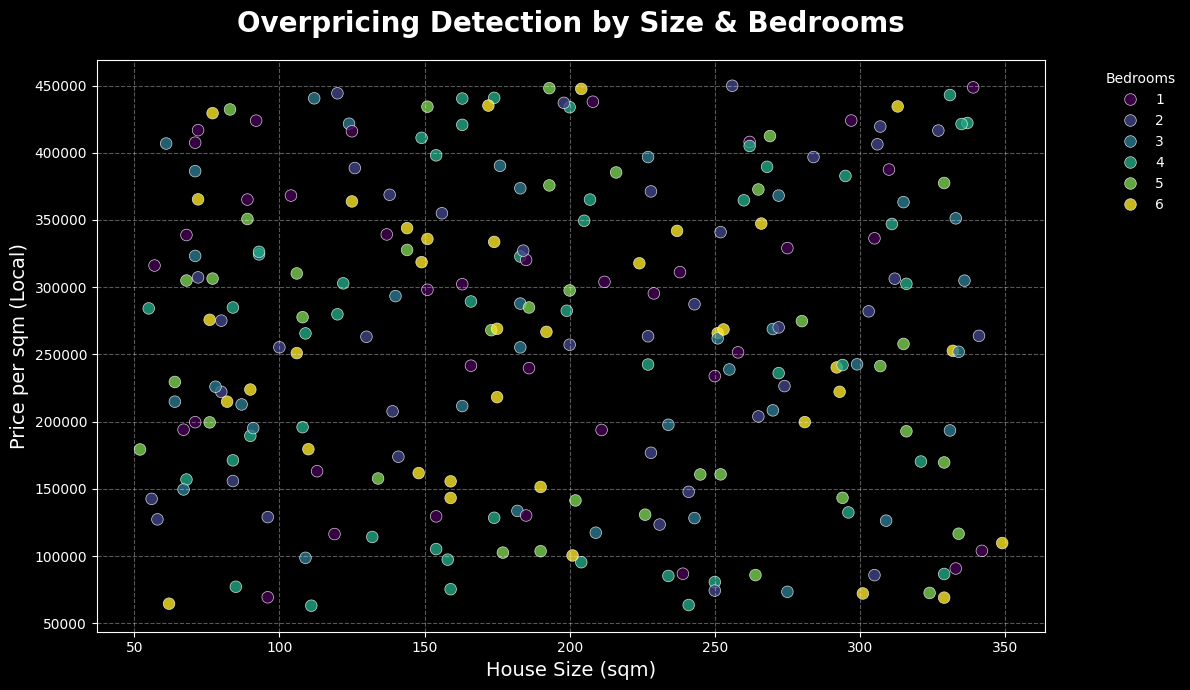

In [25]:
# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# ----------------------------
# Scatter Plot
# ----------------------------
sns.scatterplot(
    data=df,
    x="Size_sqm",
    y="Price_per_sqm_Local",
    hue="Bedrooms",
    palette="viridis",
    alpha=0.8,
    s=70,
    edgecolor="white",
    linewidth=0.5
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Overpricing Detection by Size & Bedrooms", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("House Size (sqm)", fontsize=14)
plt.ylabel("Price per sqm (Local)", fontsize=14)

# ----------------------------
# Legend
# ----------------------------
plt.legend(title="Bedrooms", frameon=False, bbox_to_anchor=(1.05, 1), loc="upper left")

# ----------------------------
# Grid
# ----------------------------
plt.grid(True, linestyle="--", alpha=0.35)

plt.tight_layout()
plt.show()

# **🛏️ 5. Bedrooms vs Value Analysis**

### **💰 1. Average Price per sqm by Bedroom Count**

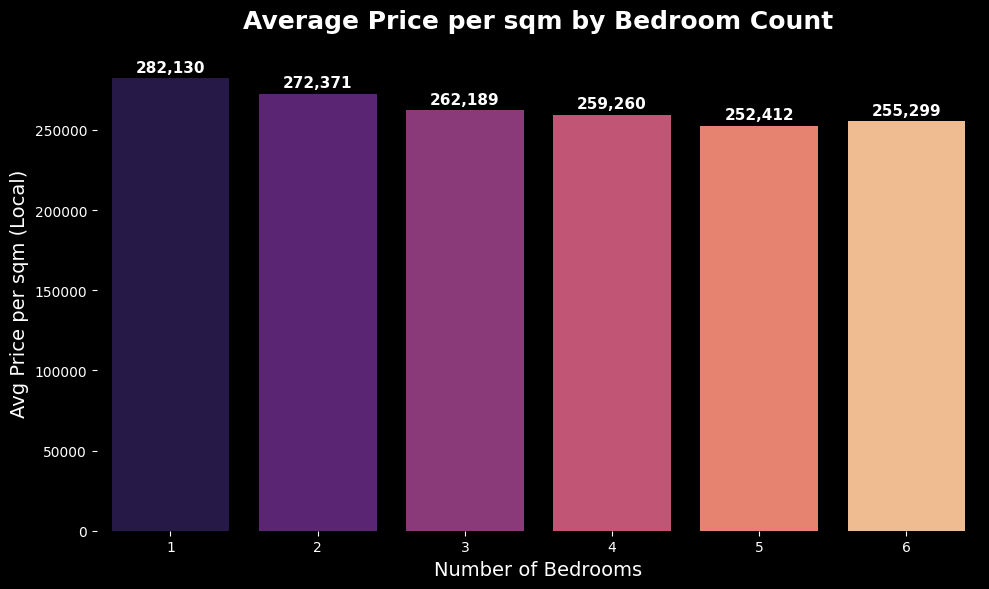

In [26]:
# ----------------------------
# Data Preparation
# ----------------------------
bed_avg_price = (
    df.groupby("Bedrooms")["Price_per_sqm_Local"]
      .mean()
      .reset_index()
)

# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))

# ----------------------------
# Bar Plot
# ----------------------------
bar = sns.barplot(
    data=bed_avg_price,
    x="Bedrooms",
    y="Price_per_sqm_Local",
    palette="magma"
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Average Price per sqm by Bedroom Count", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Number of Bedrooms", fontsize=14)
plt.ylabel("Avg Price per sqm (Local)", fontsize=14)

# ----------------------------
# Value labels
# ----------------------------
for p in bar.patches:
    bar.annotate(
        f"{p.get_height():,.0f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 8),
        textcoords="offset points",
        fontsize=11,
        color="white",
        fontweight="bold"
    )

# ----------------------------
# Clean look
# ----------------------------
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **📈 2. Price Jump per Additional Bedroom (Marginal Value)**

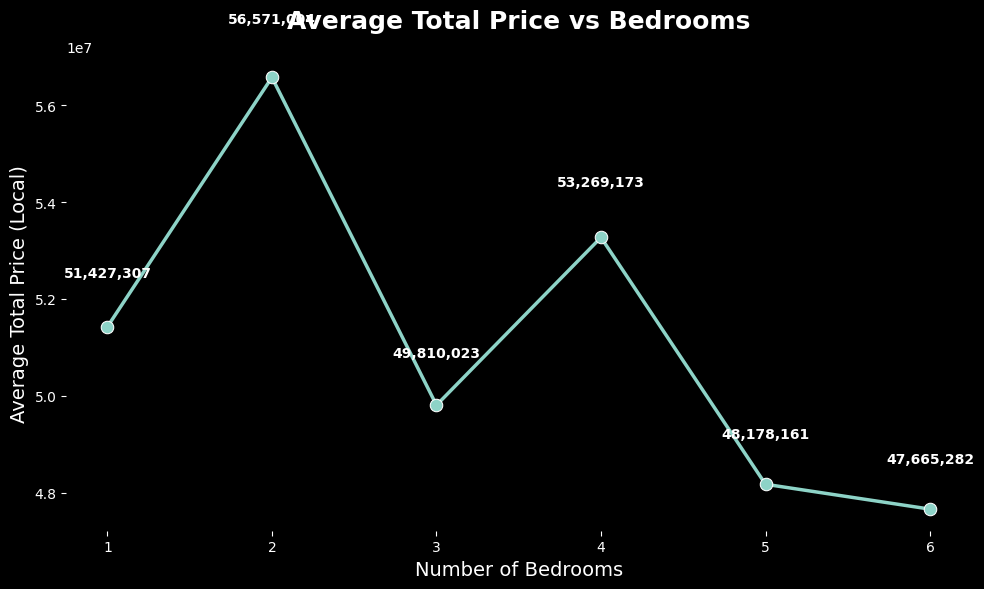

In [27]:
# ----------------------------
# Data Preparation
# ----------------------------
bed_price_jump = (
    df.groupby("Bedrooms")["Total_Price_Local"]
      .mean()
      .reset_index()
)

# ----------------------------
# Styling
# ----------------------------
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))

# ----------------------------
# Line Plot
# ----------------------------
sns.lineplot(
    data=bed_price_jump,
    x="Bedrooms",
    y="Total_Price_Local",
    marker="o",
    linewidth=2.5,
    markersize=9
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Average Total Price vs Bedrooms", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Number of Bedrooms", fontsize=14)
plt.ylabel("Average Total Price (Local)", fontsize=14)

# ----------------------------
# Value labels
# ----------------------------
for x, y in zip(bed_price_jump["Bedrooms"], bed_price_jump["Total_Price_Local"]):
    plt.text(x, y + (0.02 * y), f"{y:,.0f}", ha="center", color="white", fontweight="bold")

# ----------------------------
# Clean look
# ----------------------------
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **📊 3. Price Distribution by Bedroom Count (Overpricing Check)**

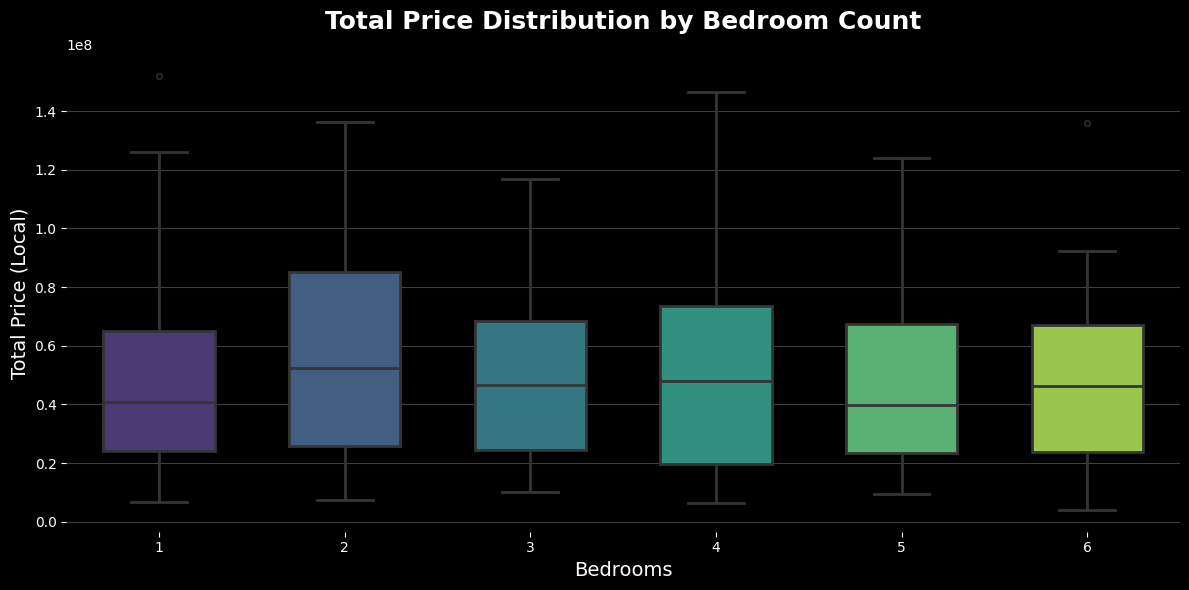

In [28]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))

# ----------------------------
# Box Plot
# ----------------------------
sns.boxplot(
    data=df,
    x="Bedrooms",
    y="Total_Price_Local",
    palette="viridis",
    width=0.6,
    fliersize=4,
    linewidth=2
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Total Price Distribution by Bedroom Count", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Bedrooms", fontsize=14)
plt.ylabel("Total Price (Local)", fontsize=14)

# ----------------------------
# Add grid & remove spines for clean look
# ----------------------------
plt.grid(axis="y", alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🏠 4. Typical Bedroom Count per Area (Market Preference)**

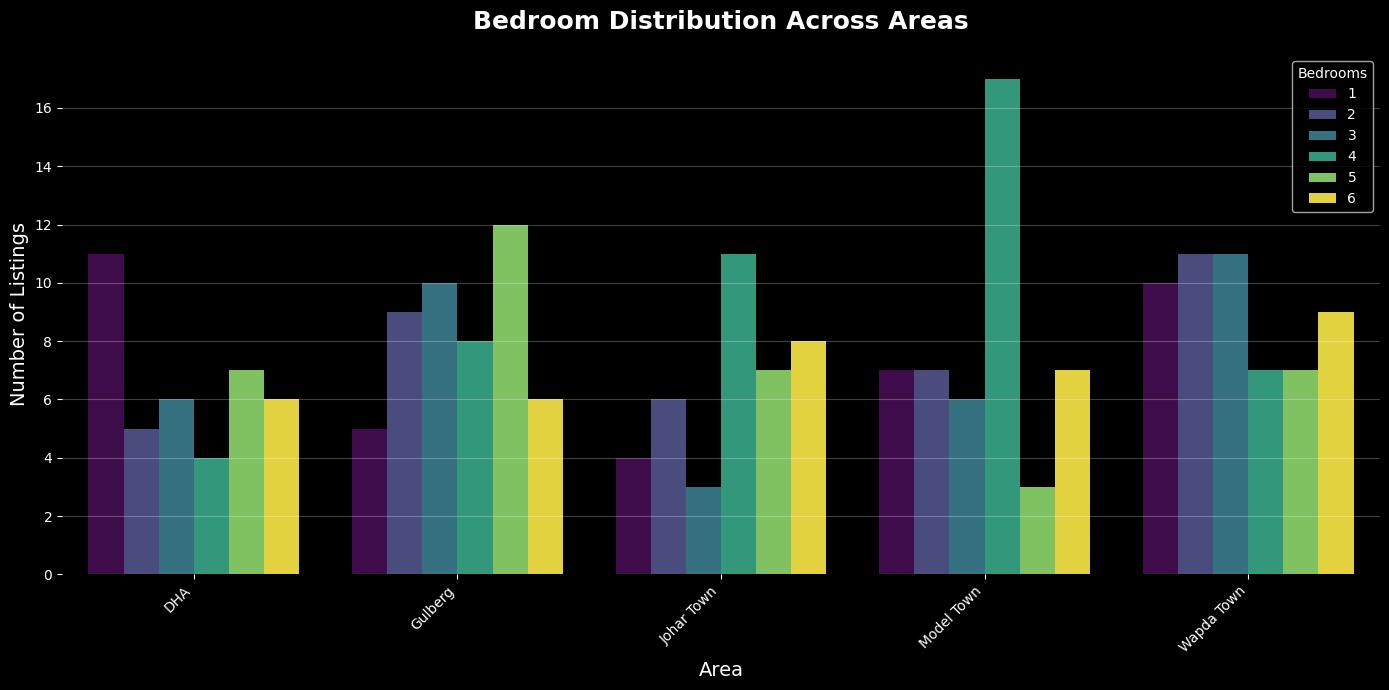

In [29]:
bed_area = ( df.groupby(["Area", "Bedrooms"]) .size() .reset_index(name="Listings") )

plt.style.use("dark_background")
plt.figure(figsize=(14, 7))

# ----------------------------
# Stacked Bar Plot
# ----------------------------
sns.barplot(
    data=bed_area,
    x="Area",
    y="Listings",
    hue="Bedrooms",
    palette="viridis"
)

# ----------------------------
# Title & Labels
# ----------------------------
plt.title("Bedroom Distribution Across Areas", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Area", fontsize=14)
plt.ylabel("Number of Listings", fontsize=14)

# ----------------------------
# Styling
# ----------------------------
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", alpha=0.25)
plt.legend(title="Bedrooms", loc="upper right")

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **⭐ 5. Identifying the “Sweet Spot” (Value vs Popularity)**

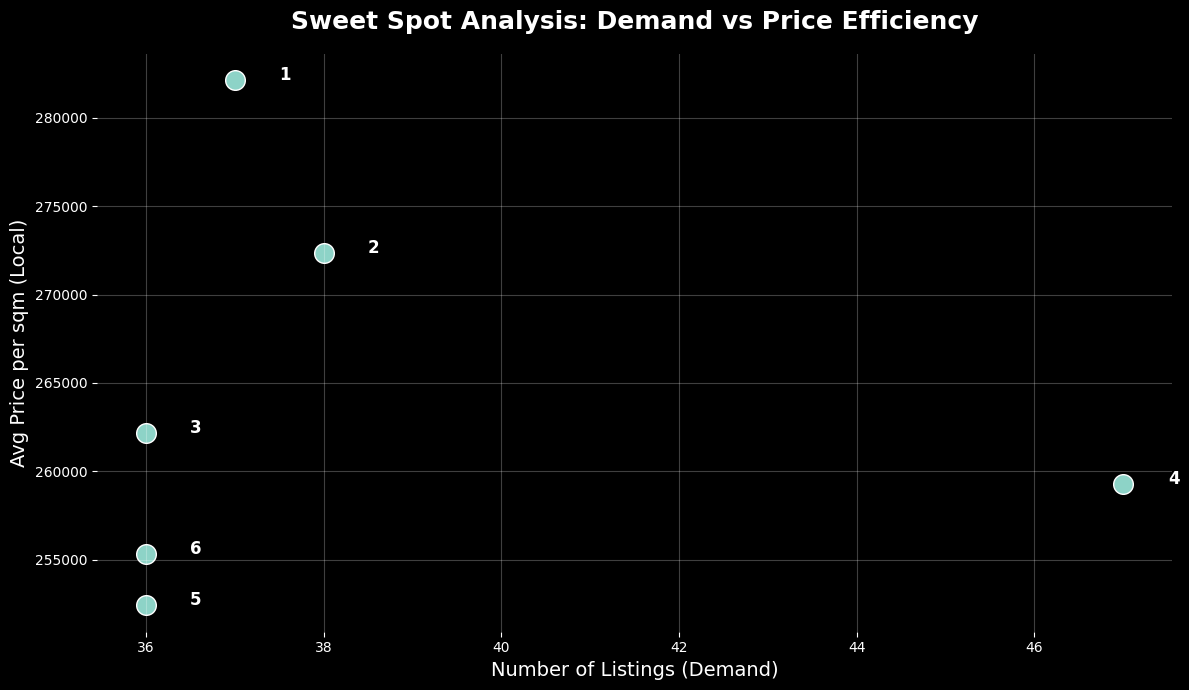

In [30]:
bed_summary = (
    df.groupby("Bedrooms")
      .agg(
          Avg_Price_per_sqm=("Price_per_sqm_Local", "mean"),
          Listings=("Bedrooms", "count")
      )
      .reset_index()
)

plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Scatter Plot
sns.scatterplot(
    data=bed_summary,
    x="Listings",
    y="Avg_Price_per_sqm",
    s=200,
    linewidth=1,
    edgecolor="white",
    palette="viridis",
    legend=False
)

# Text labels (Bedrooms)
for _, row in bed_summary.iterrows():
    plt.text(
        row["Listings"] + 0.5,
        row["Avg_Price_per_sqm"],
        int(row["Bedrooms"]),
        fontsize=12,
        fontweight="bold",
        color="white"
    )

# Title & Labels
plt.title("Sweet Spot Analysis: Demand vs Price Efficiency", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Number of Listings (Demand)", fontsize=14)
plt.ylabel("Avg Price per sqm (Local)", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# **💸 6. Total Price vs Price per sqm Consistency**

### **🔢 1. Actual vs Expected Total Price (Core Consistency Check)**

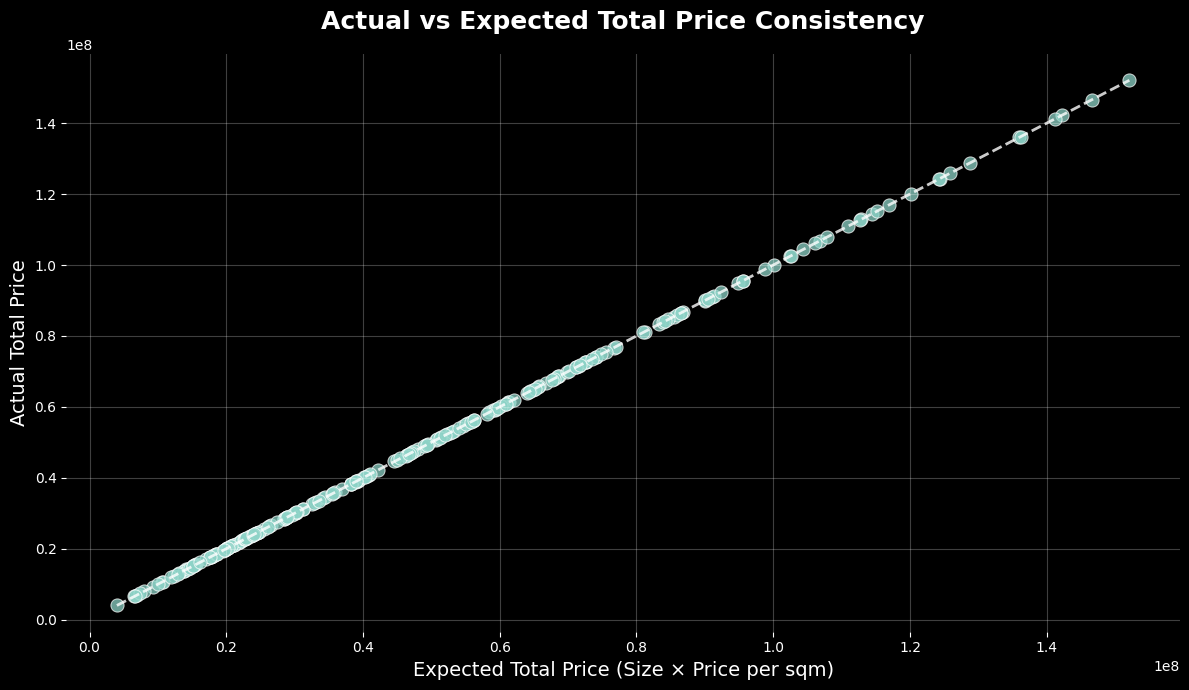

In [31]:
df["Expected_Total_Price"] = df["Size_sqm"] * df["Price_per_sqm_Local"]

plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Scatter plot
sns.scatterplot(
    data=df,
    x="Expected_Total_Price",
    y="Total_Price_Local",
    alpha=0.75,
    s=90,
    edgecolor="white",
    linewidth=0.7
)

# Diagonal line (Expected = Actual)
min_val = min(df["Expected_Total_Price"].min(), df["Total_Price_Local"].min())
max_val = max(df["Expected_Total_Price"].max(), df["Total_Price_Local"].max())

plt.plot(
    [min_val, max_val],
    [min_val, max_val],
    linestyle="--",
    linewidth=2,
    alpha=0.8,
    color="white"
)

# Title & Labels
plt.title("Actual vs Expected Total Price Consistency", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Expected Total Price (Size × Price per sqm)", fontsize=14)
plt.ylabel("Actual Total Price", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **📏 2. Price Residuals (Overpricing & Underpricing)**

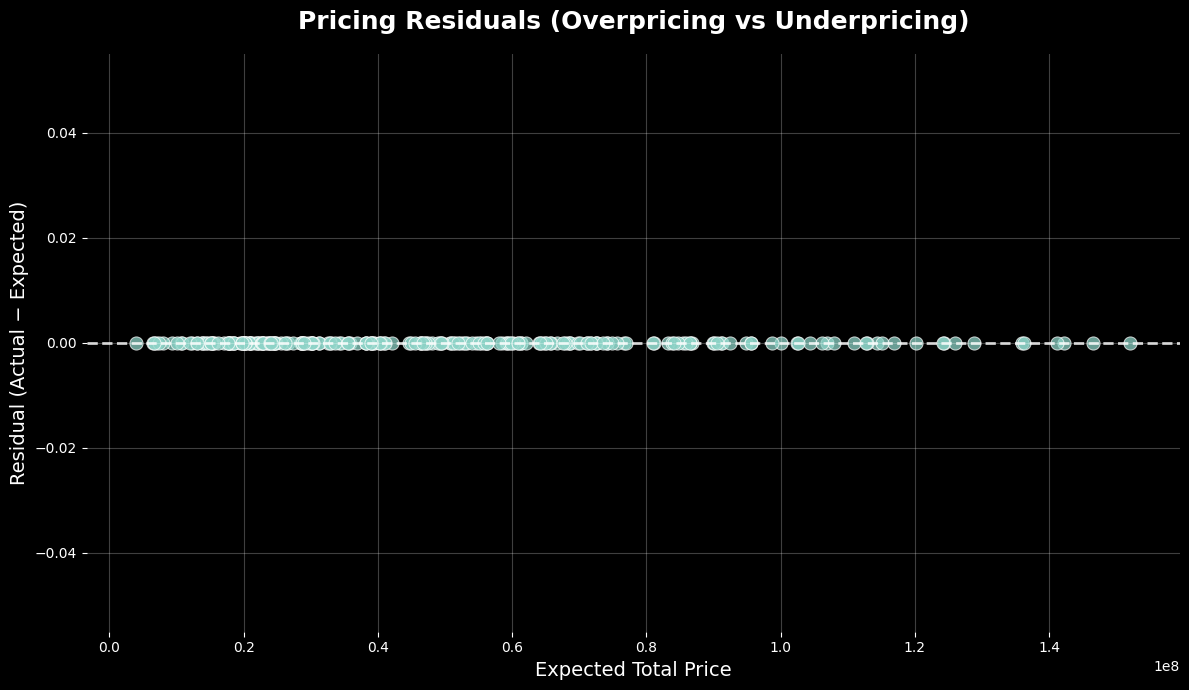

In [32]:
df["Price_Residual"] = df["Total_Price_Local"] - df["Expected_Total_Price"]

plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Scatter plot
sns.scatterplot(
    data=df,
    x="Expected_Total_Price",
    y="Price_Residual",
    alpha=0.75,
    s=90,
    edgecolor="white",
    linewidth=0.7
)

# Horizontal line at y=0
plt.axhline(0, linestyle="--", linewidth=2, alpha=0.8, color="white")

# Title & Labels
plt.title("Pricing Residuals (Overpricing vs Underpricing)", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Expected Total Price", fontsize=14)
plt.ylabel("Residual (Actual − Expected)", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **📊 3. Residual Distribution (Market Noise Check)**

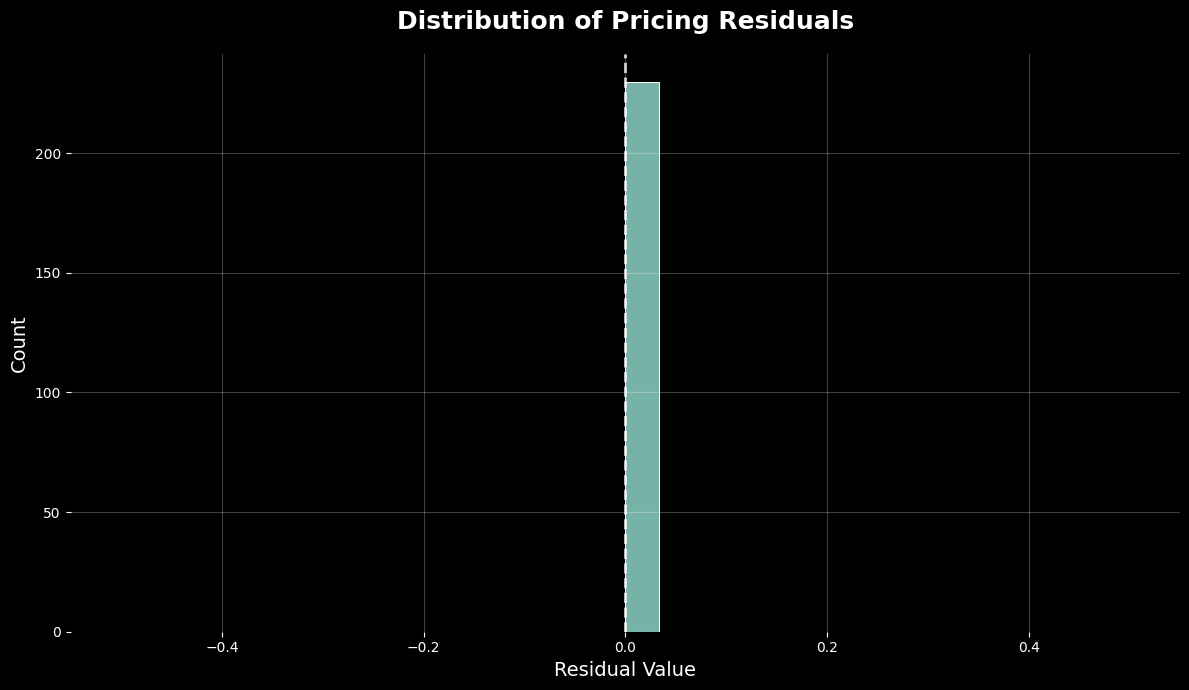

In [33]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Histogram
sns.histplot(
    data=df,
    x="Price_Residual",
    bins=30,
    kde=True,
    stat="count",
    edgecolor="white",
    linewidth=0.7,
    alpha=0.85
)

# Vertical line at 0
plt.axvline(0, linestyle="--", linewidth=2, alpha=0.8, color="white")

# Title & Labels
plt.title("Distribution of Pricing Residuals", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Residual Value", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🚨 4. Outlier Detection (Suspicious Listings)**

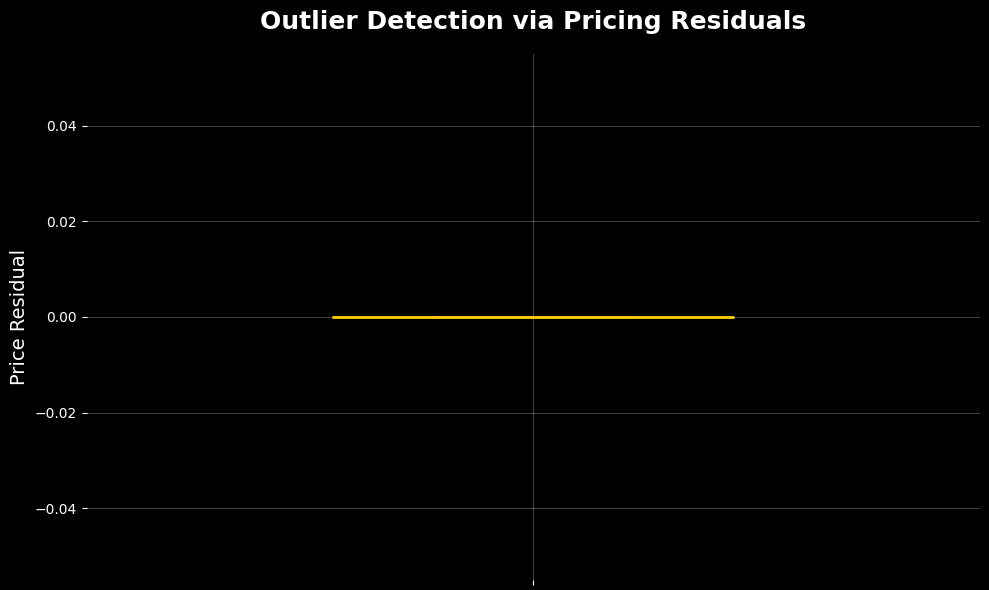

In [34]:
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(
    data=df,
    y="Price_Residual",
    width=0.45,
    showcaps=True,
    boxprops={"facecolor":"#2b2b2b", "edgecolor":"white"},
    whiskerprops={"color":"white"},
    capprops={"color":"white"},
    medianprops={"color":"#ffcc00", "linewidth":2},
    flierprops={"marker":"o", "markerfacecolor":"#ff4d4d", "markersize":6, "markeredgecolor":"white"}
)

# Title & Labels
plt.title("Outlier Detection via Pricing Residuals", fontsize=18, fontweight="bold", pad=18)
plt.ylabel("Price Residual", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🧪 5. Consistency by Area (Systematic Issues?)**

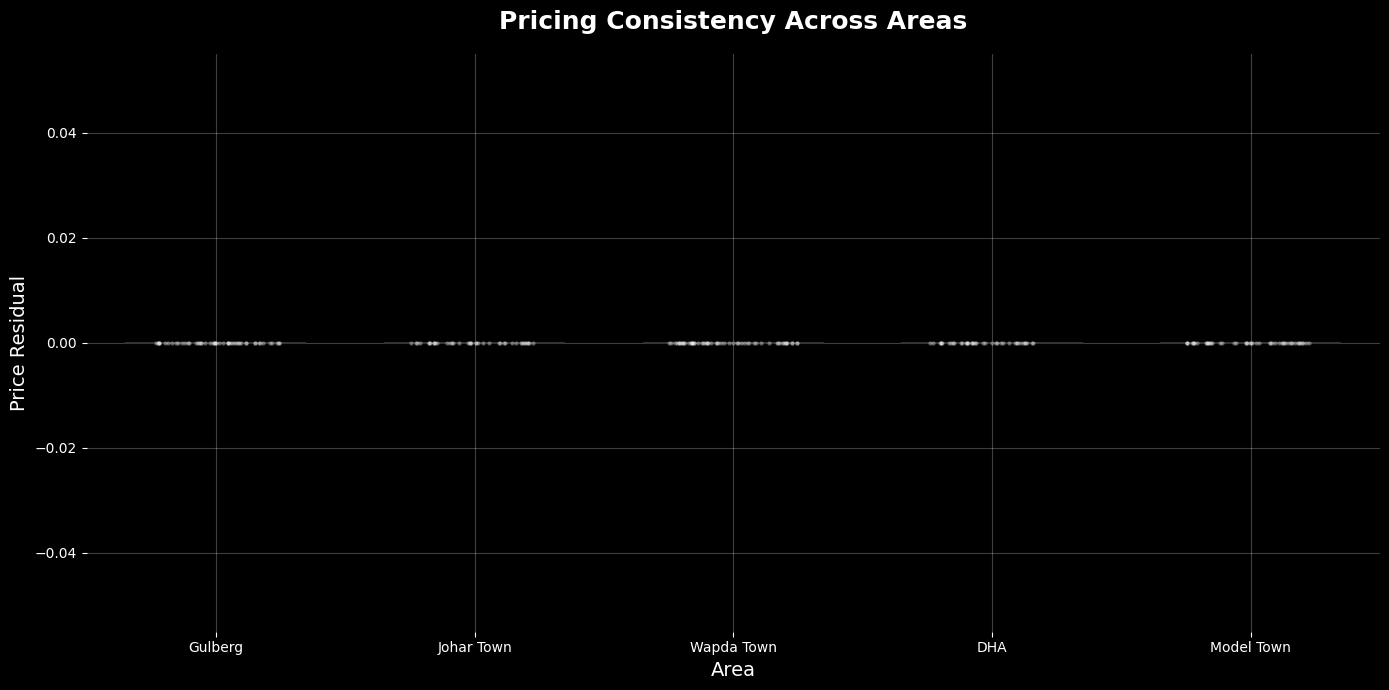

In [35]:
plt.style.use("dark_background")
plt.figure(figsize=(14, 7))

# Box plot
sns.boxplot(
    data=df,
    x="Area",
    y="Price_Residual",
    palette="viridis",
    width=0.7,
    showfliers=True,
    fliersize=4,
    linewidth=1.2
)

# Add jittered strip plot on top for density effect
sns.stripplot(
    data=df,
    x="Area",
    y="Price_Residual",
    color="white",
    alpha=0.35,
    size=3,
    jitter=0.25
)

# Title & Labels
plt.title("Pricing Consistency Across Areas", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Area", fontsize=14)
plt.ylabel("Price Residual", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# **🚨 7. Outlier Detection (Hidden Stories)**

### **🧮 1. Z-Score Outlier Detection (Price per sqm)**

This helps identify extremely overpriced or underpriced properties.

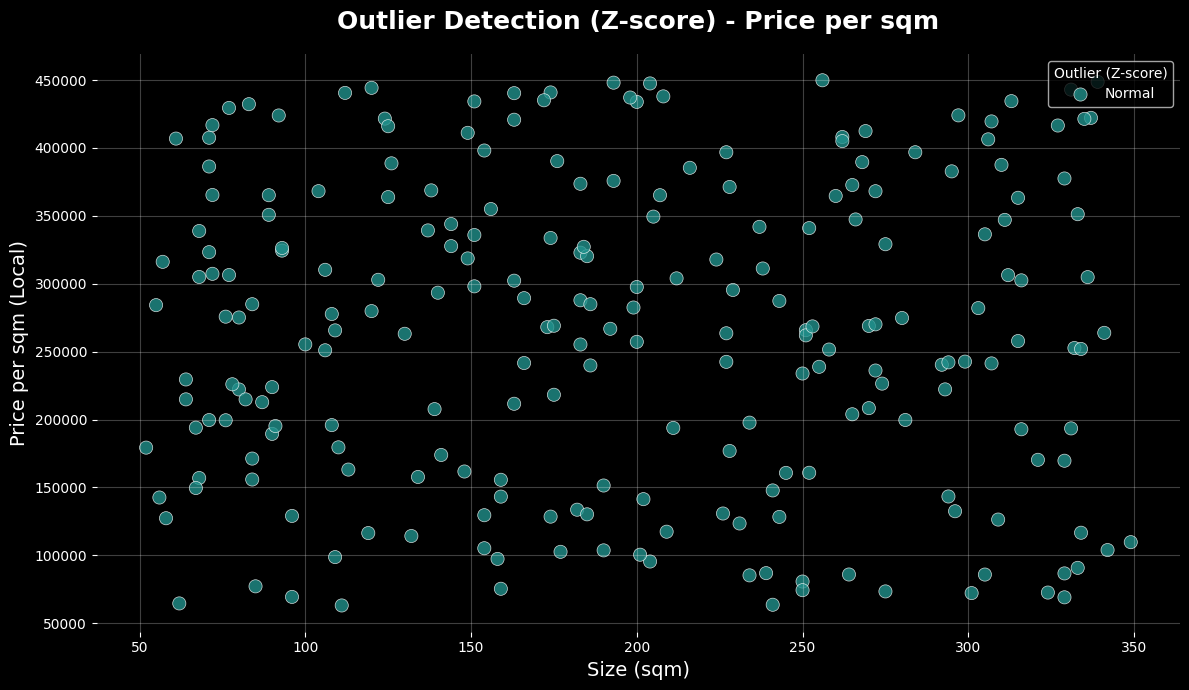

In [36]:
df["z_score_price"] = (df["Price_per_sqm_Local"] - df["Price_per_sqm_Local"].mean()) / df["Price_per_sqm_Local"].std()
df["outlier_z"] = np.where(df["z_score_price"].abs() > 3, "Outlier", "Normal")

plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Scatter plot
sns.scatterplot(
    data=df,
    x="Size_sqm",
    y="Price_per_sqm_Local",
    hue="outlier_z",
    palette="viridis",
    alpha=0.8,
    edgecolor="white",
    linewidth=0.5,
    s=90
)

# Title & Labels
plt.title("Outlier Detection (Z-score) - Price per sqm", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Size (sqm)", fontsize=14)
plt.ylabel("Price per sqm (Local)", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.legend(title="Outlier (Z-score)", loc="upper right", frameon=True)

plt.tight_layout()
plt.show()

### **📊 2. Box Plot Outliers (Price per sqm)**

A classic method to visualize extreme values.

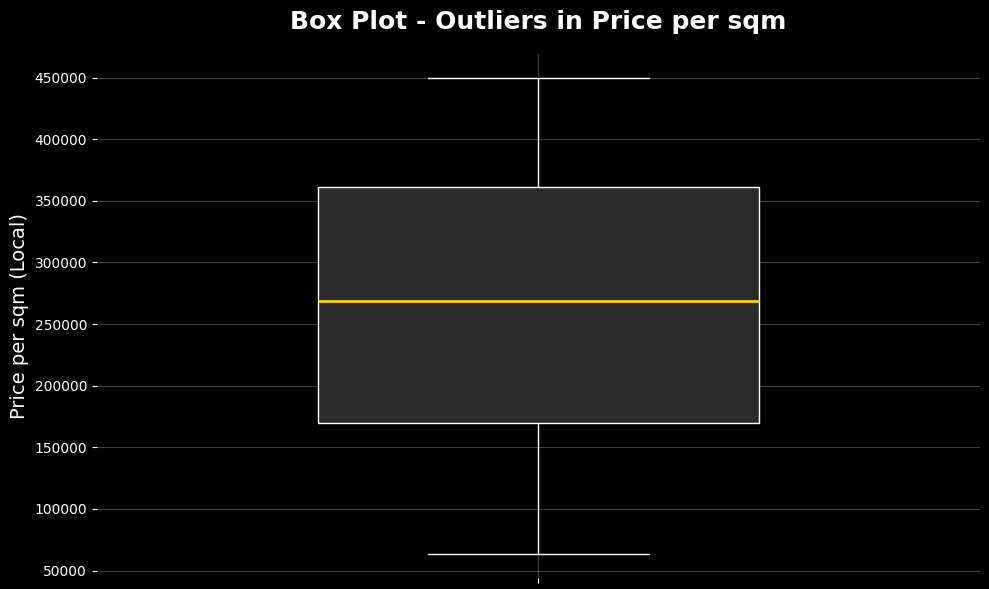

In [37]:
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(
    data=df,
    y="Price_per_sqm_Local",
    width=0.5,
    showcaps=True,
    boxprops={"facecolor":"#2b2b2b", "edgecolor":"white"},
    whiskerprops={"color":"white"},
    capprops={"color":"white"},
    medianprops={"color":"#ffcc00", "linewidth":2},
    flierprops={"marker":"o", "markerfacecolor":"#ff4d4d", "markersize":6, "markeredgecolor":"white"}
)

# Title & Labels
plt.title("Box Plot - Outliers in Price per sqm", fontsize=18, fontweight="bold", pad=18)
plt.ylabel("Price per sqm (Local)", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🏘️ 3. Area-wise Outlier Frequency (Where anomalies happen most)**

This tells which areas have the most suspicious listings.

Empty DataFrame
Columns: [Area, Outlier_Count]
Index: []


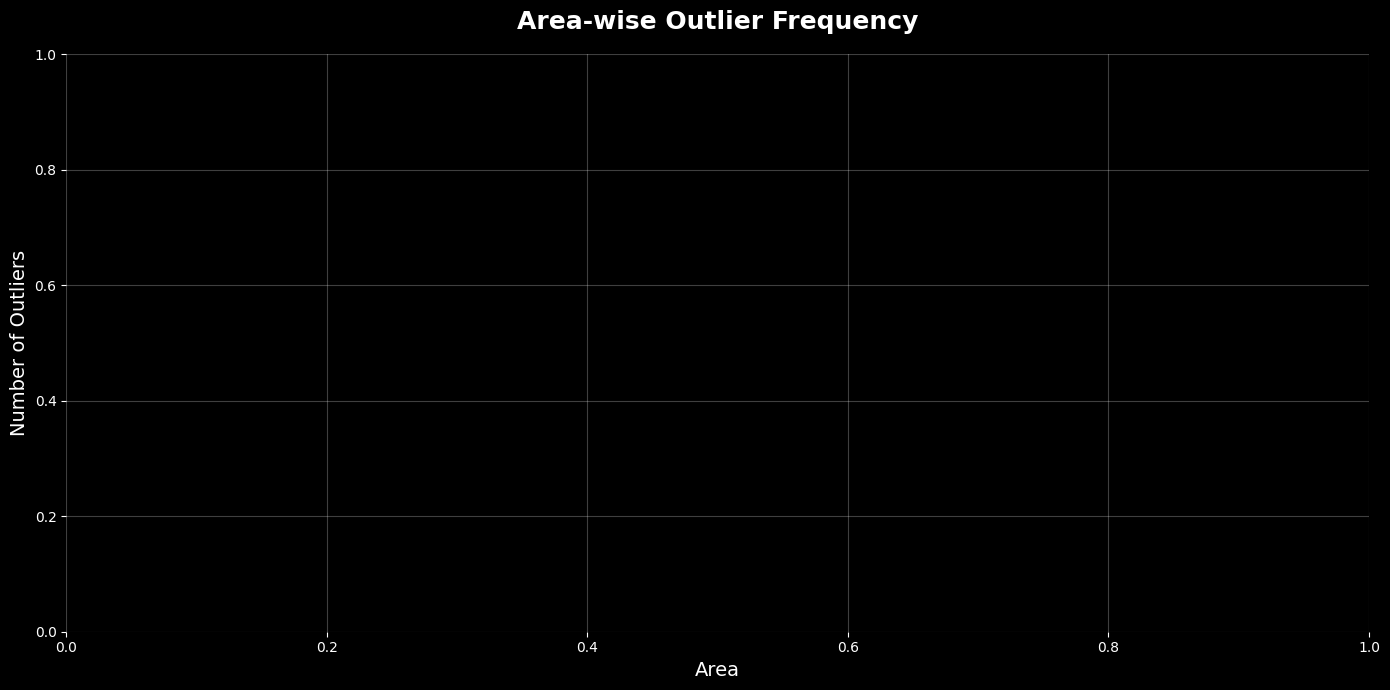

In [38]:
# Filter based on a robust condition
area_outliers = (
    df[df["outlier_z"].isin(["Outlier", "outlier", 1, "1", True])]
      .groupby("Area")
      .size()
      .reset_index(name="Outlier_Count")
      .sort_values(by="Outlier_Count", ascending=False)
)

print(area_outliers.head())  # Check if it has data

plt.style.use("dark_background")
plt.figure(figsize=(14, 7))

sns.barplot(
    data=area_outliers,
    x="Area",
    y="Outlier_Count",
    palette="viridis"
)

for index, row in area_outliers.iterrows():
    plt.text(
        index,
        row["Outlier_Count"] + 0.5,
        int(row["Outlier_Count"]),
        ha="center",
        fontsize=12,
        fontweight="bold",
        color="white"
    )

plt.title("Area-wise Outlier Frequency", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Area", fontsize=14)
plt.ylabel("Number of Outliers", fontsize=14)

plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🧠 4. Mean vs Median Comparison (Should you use median?)**

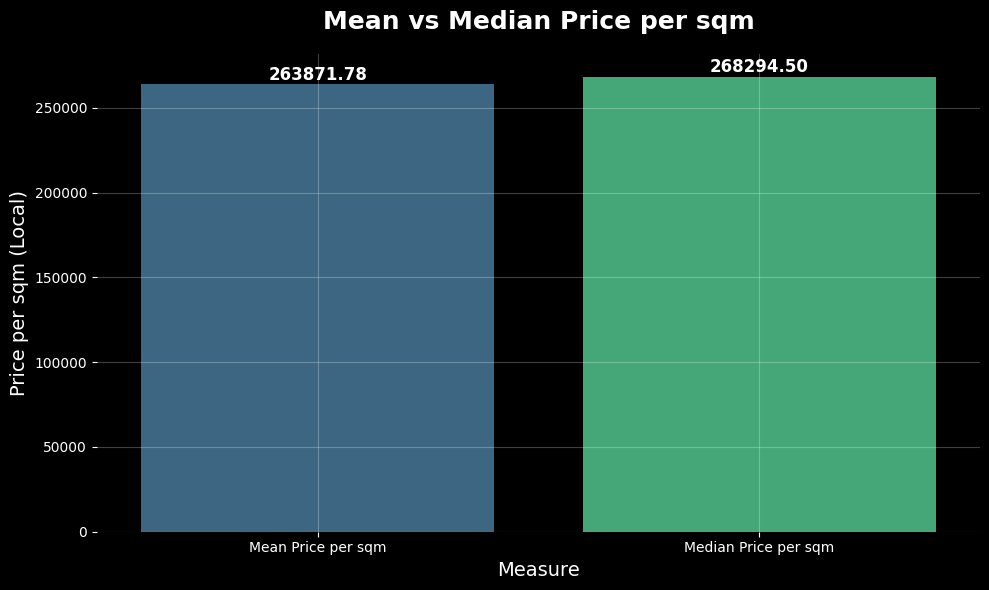

In [39]:
mean_price = df["Price_per_sqm_Local"].mean()
median_price = df["Price_per_sqm_Local"].median()

plt.style.use("dark_background")
plt.figure(figsize=(10, 6))

# Prepare data
summary = pd.DataFrame({
    "Measure": ["Mean Price per sqm", "Median Price per sqm"],
    "Value": [mean_price, median_price]
})

# Bar plot
sns.barplot(
    data=summary,
    x="Measure",
    y="Value",
    palette="viridis"
)

# Add labels on bars
for index, row in summary.iterrows():
    plt.text(
        index,
        row["Value"] + (summary["Value"].max() * 0.01),
        f"{row['Value']:.2f}",
        ha="center",
        fontsize=12,
        fontweight="bold",
        color="white"
    )

# Title & Labels
plt.title("Mean vs Median Price per sqm", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Measure", fontsize=14)
plt.ylabel("Price per sqm (Local)", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🔍 5. Outlier Impact on Average Price by Area**

This shows how outliers distort area-wise averages.

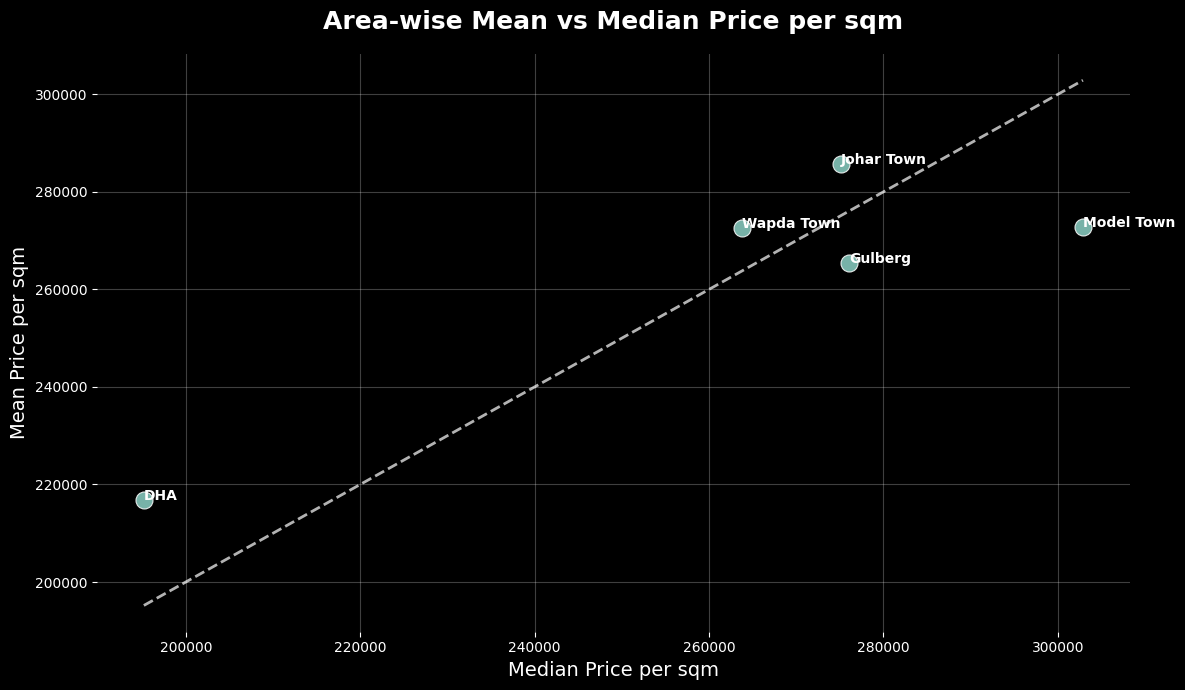

In [40]:
area_mean = df.groupby("Area")["Price_per_sqm_Local"].mean().reset_index(name="Mean")
area_median = df.groupby("Area")["Price_per_sqm_Local"].median().reset_index(name="Median")

area_compare = area_mean.merge(area_median, on="Area")

plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Scatter plot
sns.scatterplot(
    data=area_compare,
    x="Median",
    y="Mean",
    s=150,
    edgecolor="white",
    linewidth=0.8,
    alpha=0.85
)

# Add text labels
for _, row in area_compare.iterrows():
    plt.text(
        row["Median"] + 0.01,
        row["Mean"] + 0.01,
        row["Area"],
        fontsize=10,
        fontweight="bold",
        color="white"
    )

# Diagonal line (Mean = Median)
min_val = min(area_compare["Median"].min(), area_compare["Mean"].min())
max_val = max(area_compare["Median"].max(), area_compare["Mean"].max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle="--", linewidth=2, alpha=0.7, color="white")

# Title & Labels
plt.title("Area-wise Mean vs Median Price per sqm", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Median Price per sqm", fontsize=14)
plt.ylabel("Mean Price per sqm", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# **🔗 8. Feature Relationships & Correlation**

### **📌 1. Correlation Heatmap (Overall Feature Strength)**

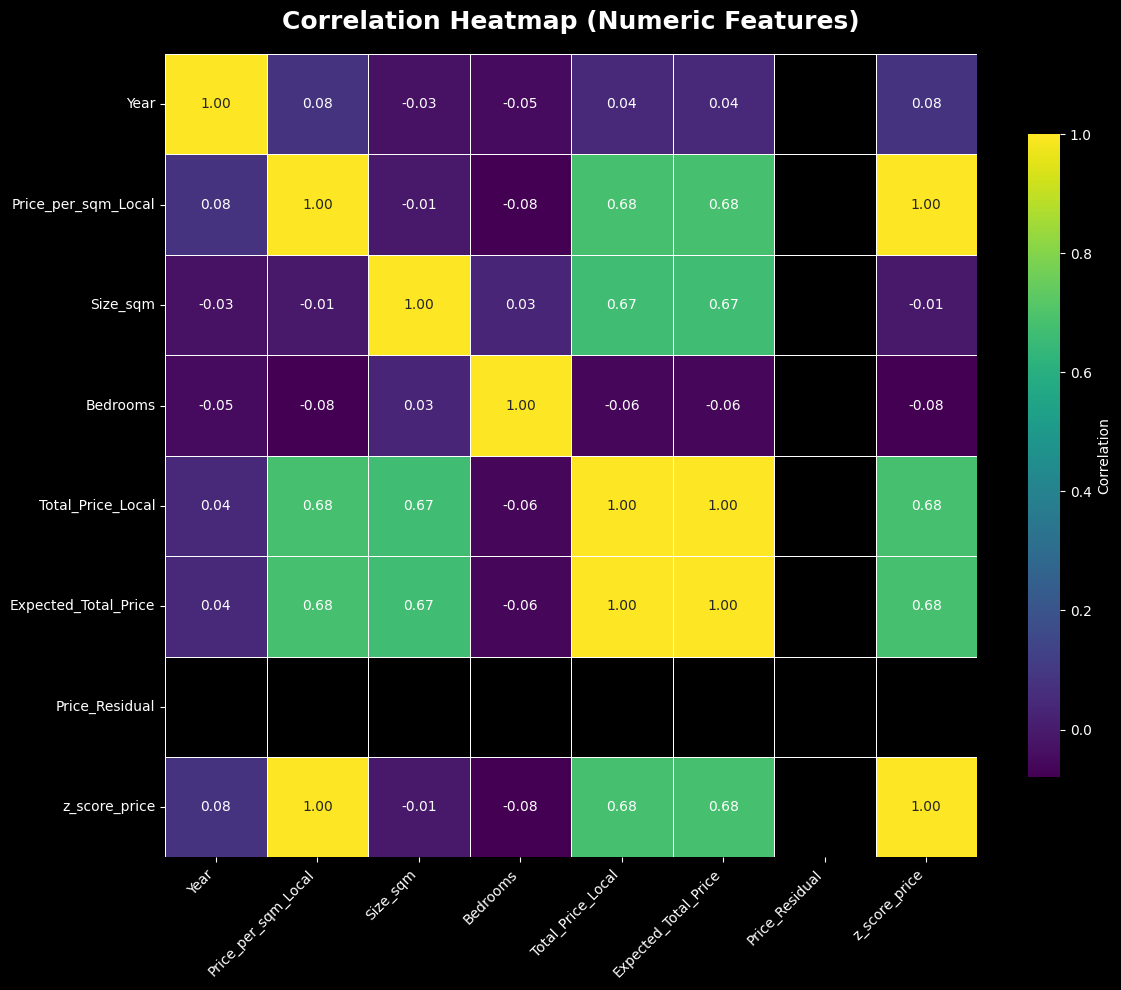

In [41]:
corr = df.select_dtypes(include=["int64", "float64"]).corr().round(2)

plt.style.use("dark_background")
plt.figure(figsize=(12, 10))

# Heatmap
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    linewidths=0.5,
    linecolor="white",
    cbar=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation"}
)

# Title
plt.title("Correlation Heatmap (Numeric Features)", fontsize=18, fontweight="bold", pad=18)

# Styling
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **📈 2. Size vs Total Price (Strongest Relationship)**

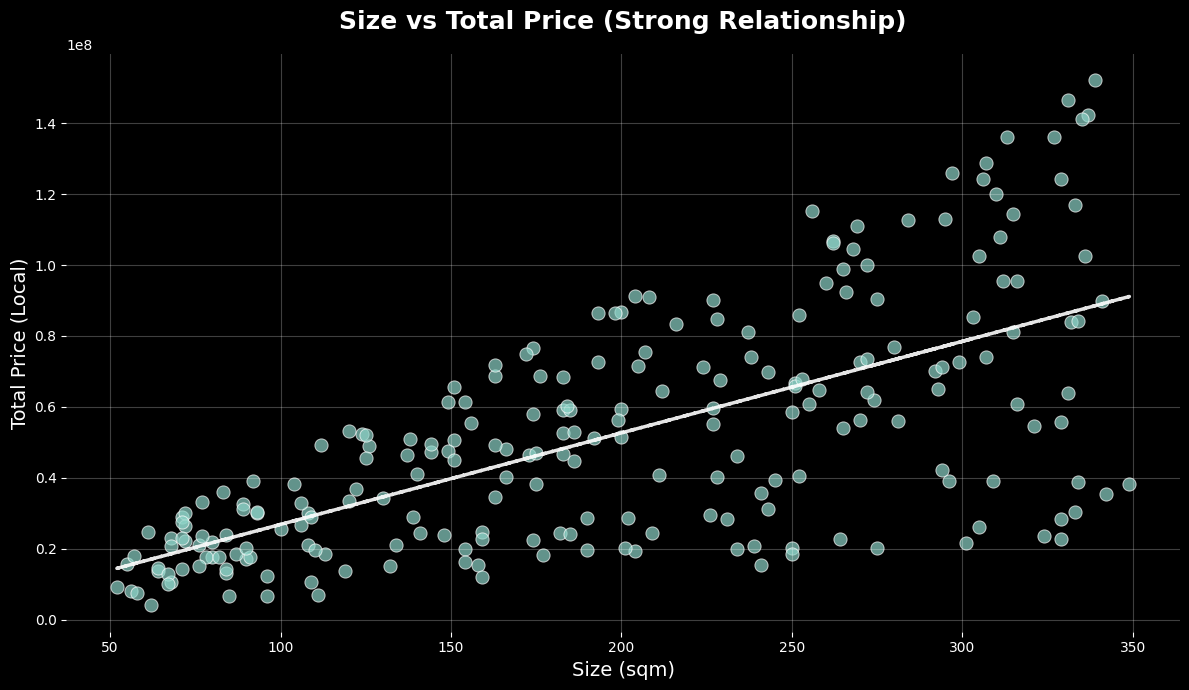

In [42]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Scatter plot
sns.scatterplot(
    data=df,
    x="Size_sqm",
    y="Total_Price_Local",
    alpha=0.7,
    s=90,
    edgecolor="white",
    linewidth=0.7
)

# OLS trendline
x = df["Size_sqm"]
y = df["Total_Price_Local"]
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
pred = model.predict(X)

plt.plot(
    x,
    pred,
    color="white",
    linewidth=2.5,
    linestyle="--",
    alpha=0.9
)

# Title & Labels
plt.title("Size vs Total Price (Strong Relationship)", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Size (sqm)", fontsize=14)
plt.ylabel("Total Price (Local)", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🛏️ 3. Bedrooms vs Size (Layout & Demand Trends)**

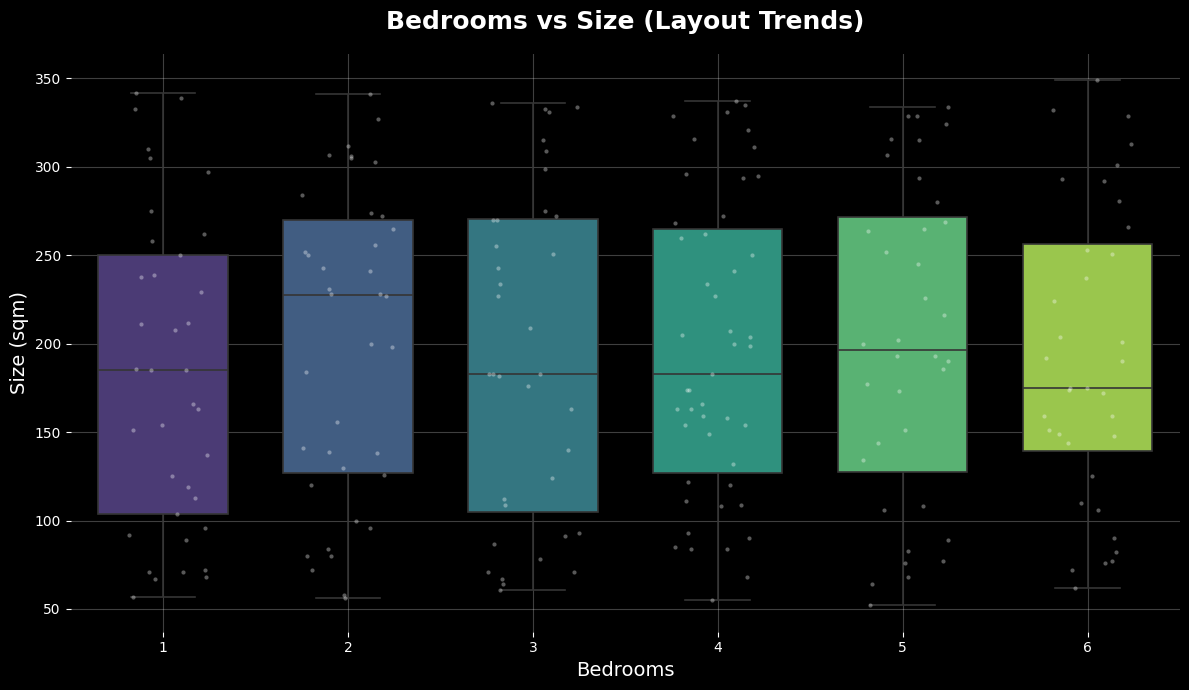

In [43]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Box plot
sns.boxplot(
    data=df,
    x="Bedrooms",
    y="Size_sqm",
    palette="viridis",
    width=0.7,
    showfliers=True,
    fliersize=4,
    linewidth=1.2
)

# Add stripplot for density effect
sns.stripplot(
    data=df,
    x="Bedrooms",
    y="Size_sqm",
    color="white",
    alpha=0.35,
    size=3,
    jitter=0.25
)

# Title & Labels
plt.title("Bedrooms vs Size (Layout Trends)", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Bedrooms", fontsize=14)
plt.ylabel("Size (sqm)", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **📈 4. Year vs Price per sqm (Inflation / Market Growth)**

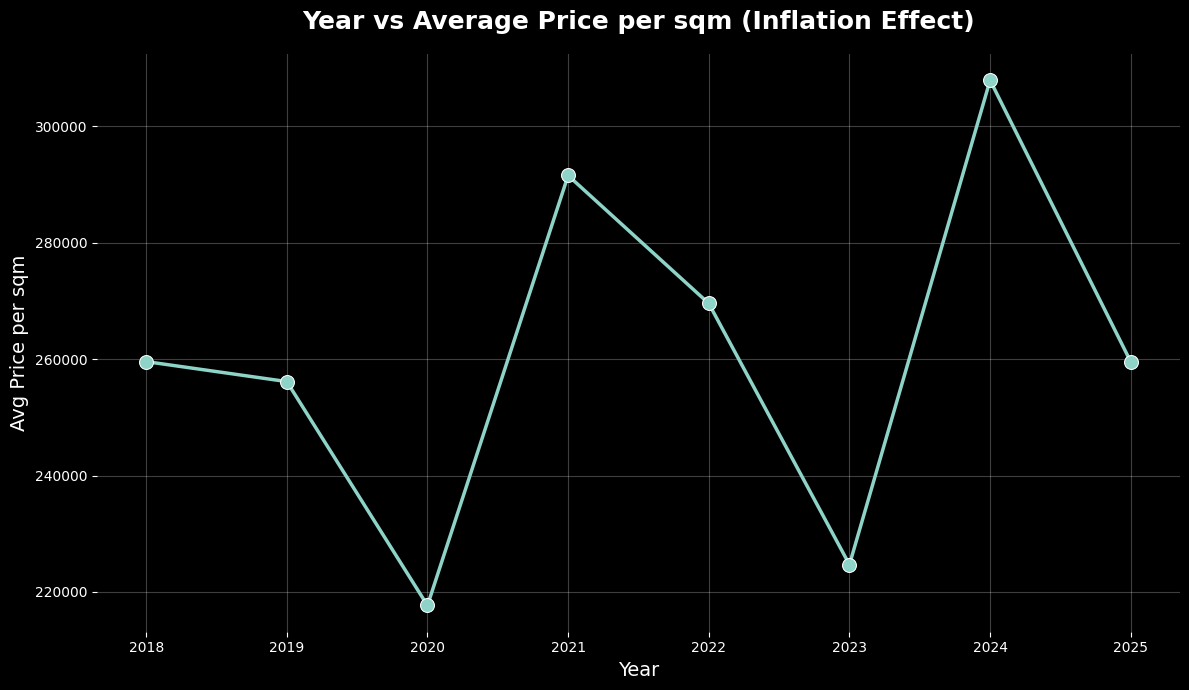

In [44]:
year_price = (
    df.groupby("Year")["Price_per_sqm_Local"]
      .mean()
      .reset_index()
)

plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Line plot with markers
sns.lineplot(
    data=year_price,
    x="Year",
    y="Price_per_sqm_Local",
    marker="o",
    linewidth=2.5,
    markersize=10
)

# Title & Labels
plt.title("Year vs Average Price per sqm (Inflation Effect)", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Avg Price per sqm", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🧠 5. Pairplot (Relationship Overview) – Plotly Style**

<Figure size 1400x1400 with 0 Axes>

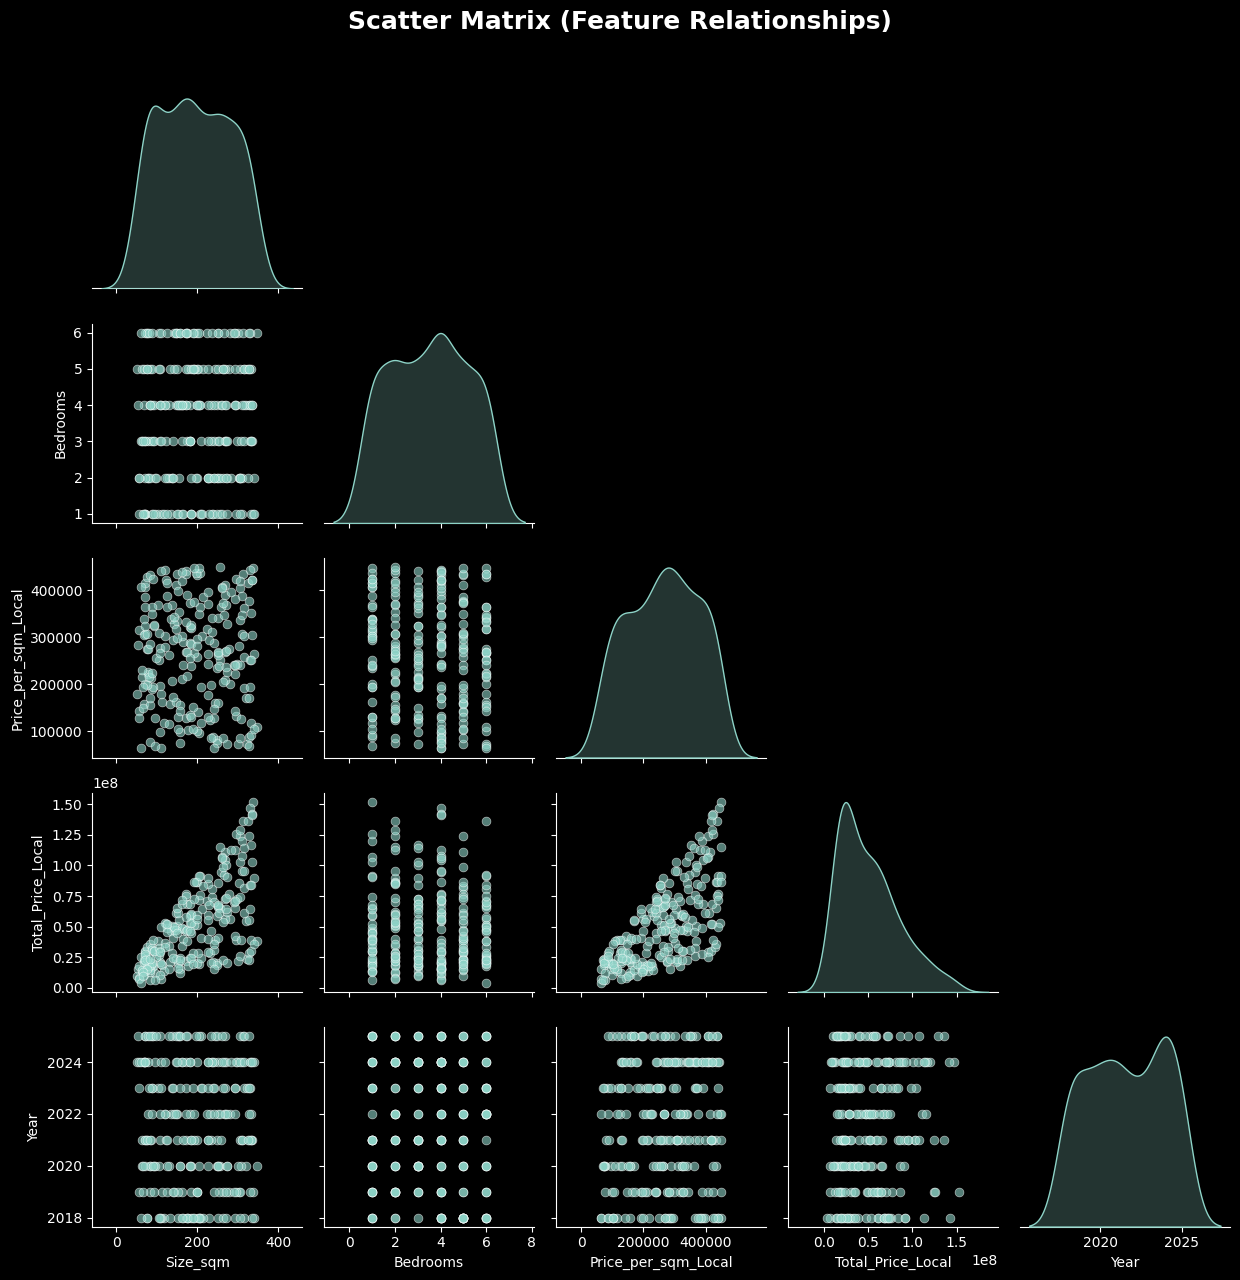

In [45]:
plt.style.use("dark_background")

# Select columns for pairplot
pair_cols = ["Size_sqm", "Bedrooms", "Price_per_sqm_Local", "Total_Price_Local", "Year"]

plt.figure(figsize=(14, 14))

# Pairplot
sns.pairplot(
    df[pair_cols],
    corner=True,
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'white'},
    diag_kind="kde",
    diag_kws={'shade': True}
)

plt.suptitle("Scatter Matrix (Feature Relationships)", fontsize=18, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

# **🧮 9. Price Efficiency & Value Metrics (Advanced EDA)**

### **✅ 1. Price per Bedroom (Value vs Bedroom Count)**

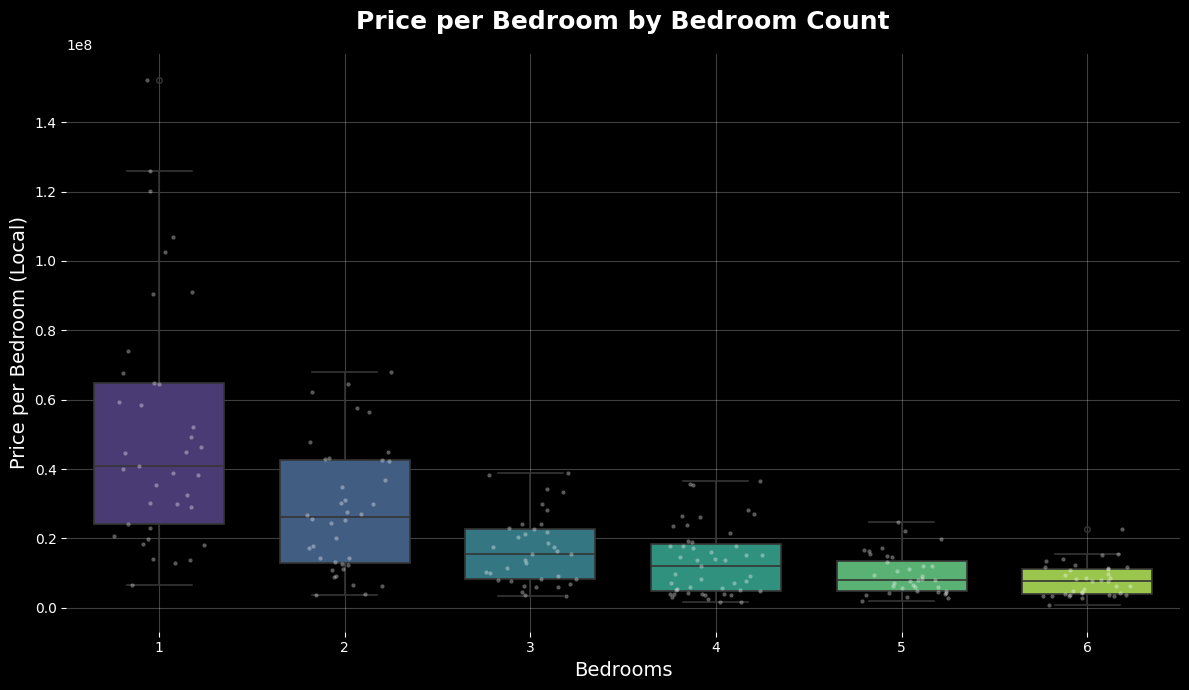

In [46]:
df["Price_per_Bedroom"] = df["Total_Price_Local"] / df["Bedrooms"]

plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Box plot
sns.boxplot(
    data=df,
    x="Bedrooms",
    y="Price_per_Bedroom",
    palette="viridis",
    width=0.7,
    showfliers=True,
    fliersize=4,
    linewidth=1.2
)

# Strip plot overlay for density
sns.stripplot(
    data=df,
    x="Bedrooms",
    y="Price_per_Bedroom",
    color="white",
    alpha=0.35,
    size=3,
    jitter=0.25
)

# Title & Labels
plt.title("Price per Bedroom by Bedroom Count", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Bedrooms", fontsize=14)
plt.ylabel("Price per Bedroom (Local)", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **📏 2. Price per sqm per Year (Time-based Value Index)**

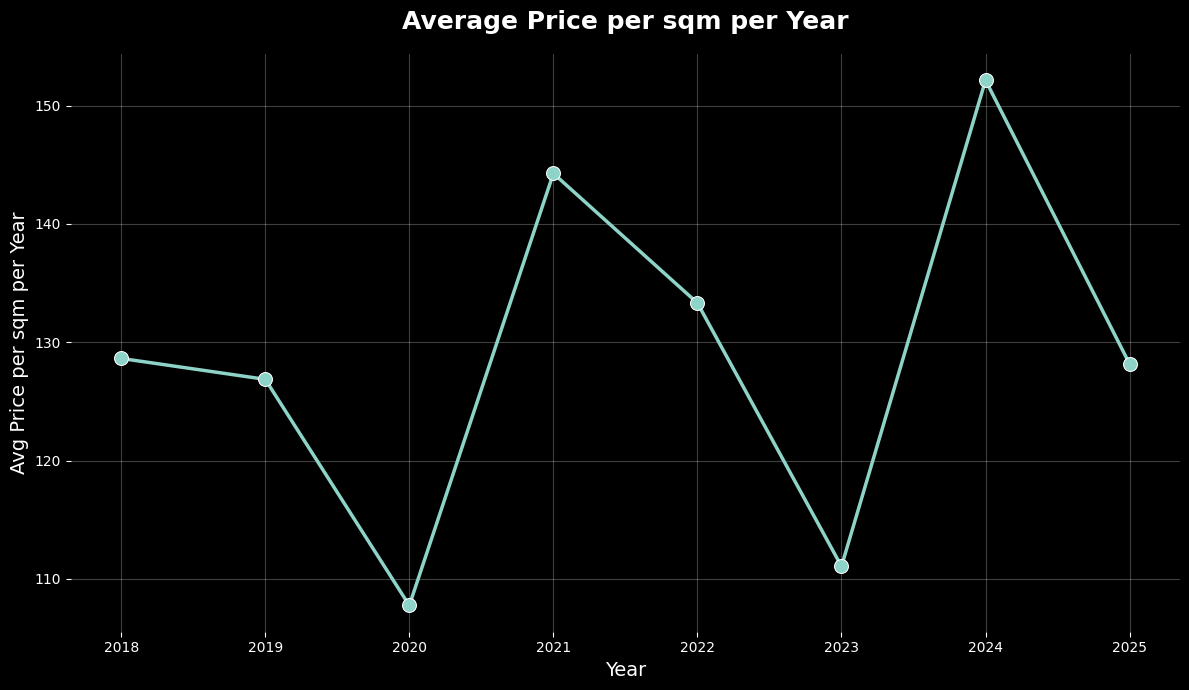

In [47]:
df["Price_per_sqm_per_Year"] = df["Price_per_sqm_Local"] / df["Year"]

plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Prepare data
year_price_per_year = (
    df.groupby("Year")["Price_per_sqm_per_Year"]
      .mean()
      .reset_index()
)

# Line plot with markers
sns.lineplot(
    data=year_price_per_year,
    x="Year",
    y="Price_per_sqm_per_Year",
    marker="o",
    linewidth=2.5,
    markersize=10
)

# Title & Labels
plt.title("Average Price per sqm per Year", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Avg Price per sqm per Year", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **📉 3. Area-wise Affordability Index (Best Value Areas)**

$ \text{Affordability Index} = \frac{\text{Median Price per sqm}}{\text{Average Size}} $

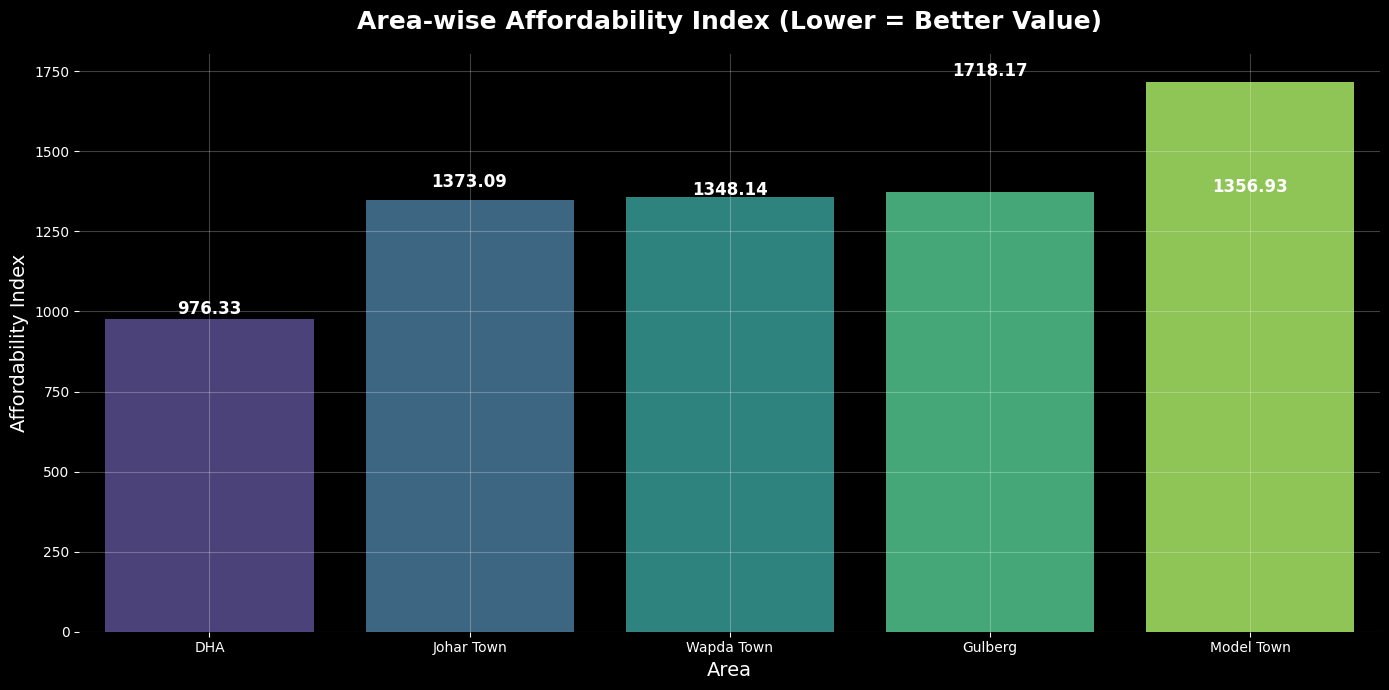

In [48]:
area_affordability = df.groupby("Area").agg({
    "Price_per_sqm_Local": "median",
    "Size_sqm": "mean"
}).reset_index()

area_affordability["Affordability_Index"] = (
    area_affordability["Price_per_sqm_Local"] / area_affordability["Size_sqm"]
)

plt.style.use("dark_background")
plt.figure(figsize=(14, 7))

# Sort for best visual order (lowest affordability = best value)
area_affordability_sorted = area_affordability.sort_values("Affordability_Index")

# Bar plot
sns.barplot(
    data=area_affordability_sorted,
    x="Area",
    y="Affordability_Index",
    palette="viridis"
)

# Add labels on bars
for idx, row in area_affordability_sorted.iterrows():
    plt.text(
        idx,
        row["Affordability_Index"] + (area_affordability_sorted["Affordability_Index"].max() * 0.01),
        f"{row['Affordability_Index']:.2f}",
        ha="center",
        fontsize=12,
        fontweight="bold",
        color="white"
    )

# Title & Labels
plt.title("Area-wise Affordability Index (Lower = Better Value)", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Area", fontsize=14)
plt.ylabel("Affordability Index", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🔥 4. Price per sqm vs Size (Value Efficiency Scatter)**

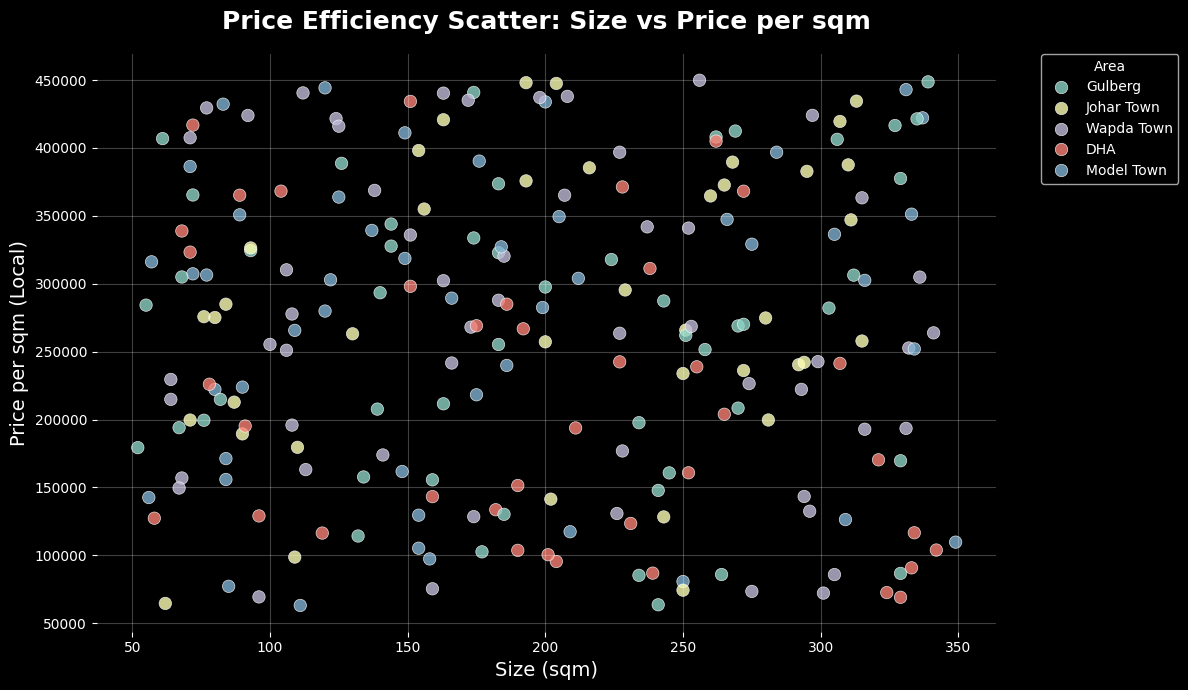

In [49]:
plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Scatter plot
sns.scatterplot(
    data=df,
    x="Size_sqm",
    y="Price_per_sqm_Local",
    hue="Area",
    alpha=0.8,
    s=80,
    edgecolor="white",
    linewidth=0.5
)

# Title & Labels
plt.title("Price Efficiency Scatter: Size vs Price per sqm", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Size (sqm)", fontsize=14)
plt.ylabel("Price per sqm (Local)", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.legend(title="Area", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0, frameon=True)

plt.tight_layout()
plt.show()

### **🧠 5. Price Efficiency Score (Combining Multiple Metrics)**

We create a combined metric:

$ \text{Efficiency Score} = \frac{\text{Price per sqm​}}{\text{Size}} $

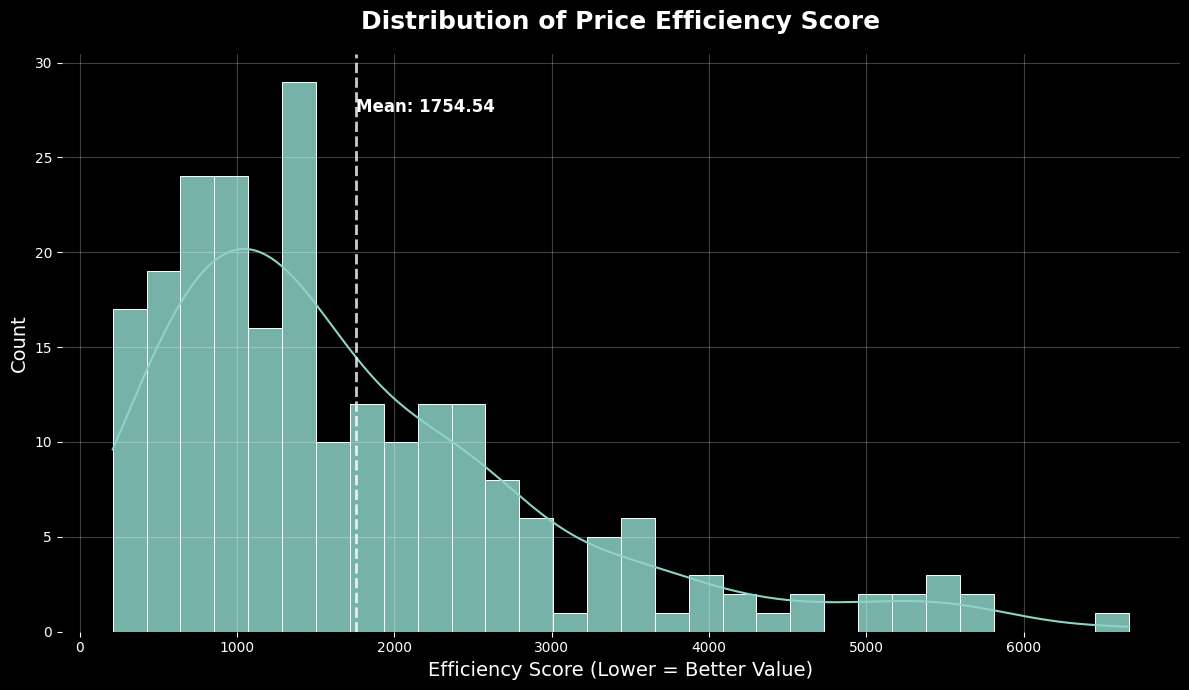

In [50]:
df["Efficiency_Score"] = df["Price_per_sqm_Local"] / df["Size_sqm"]

plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Histogram
sns.histplot(
    data=df,
    x="Efficiency_Score",
    bins=30,
    kde=True,
    edgecolor="white",
    linewidth=0.7,
    alpha=0.85
)

# Vertical line at mean
mean_eff = df["Efficiency_Score"].mean()
plt.axvline(mean_eff, linestyle="--", linewidth=2, alpha=0.8, color="white")
plt.text(mean_eff, plt.ylim()[1]*0.9, f"Mean: {mean_eff:.2f}", color="white", fontsize=12, fontweight="bold")

# Title & Labels
plt.title("Distribution of Price Efficiency Score", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Efficiency Score (Lower = Better Value)", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# **🎯 10. Actionable Stakeholder Insights**

### **✅ 1. Investors: Best Growth + Value Areas**

We combine growth (Year trend) and affordability (median price per sqm) to identify high-potential investment zones.

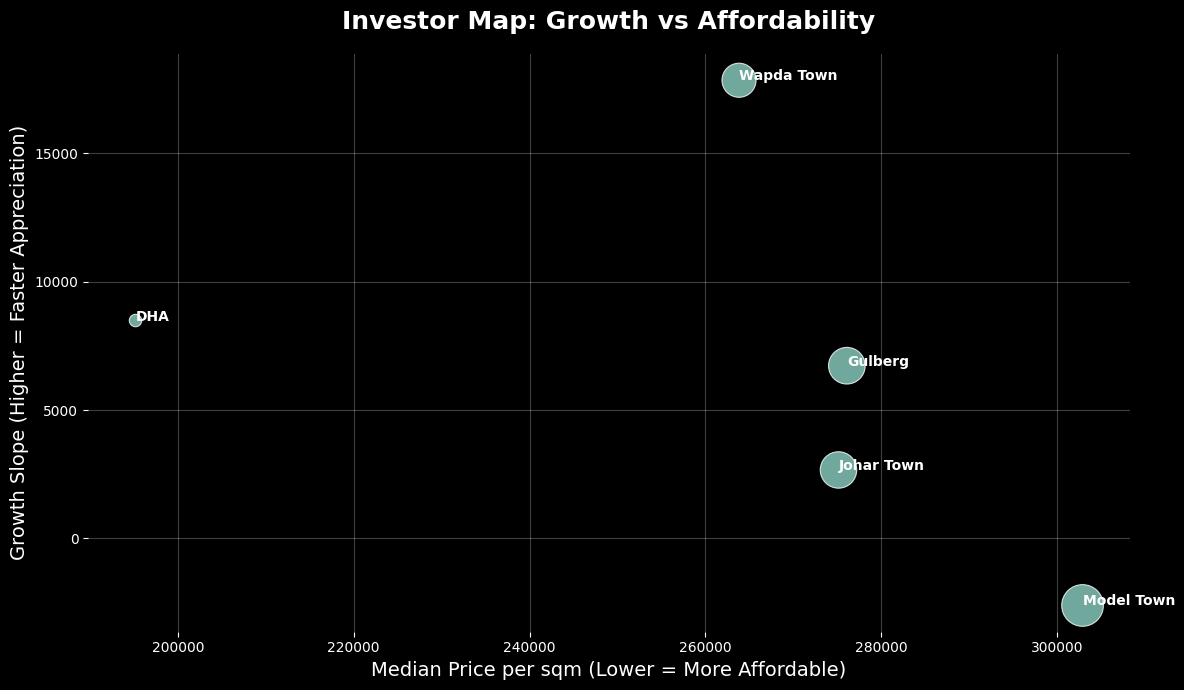

In [51]:
# Area-wise growth trend
area_growth = (
    df.groupby(["Area", "Year"])["Price_per_sqm_Local"]
    .median()
    .reset_index()
)

# compute slope of trend for each area (simple linear regression)


slopes = []
for area in area_growth["Area"].unique():
    temp = area_growth[area_growth["Area"] == area]
    X = temp["Year"].values.reshape(-1, 1)
    y = temp["Price_per_sqm_Local"].values
    if len(temp) > 1:
        lr = LinearRegression()
        lr.fit(X, y)
        slopes.append([area, lr.coef_[0]])
    else:
        slopes.append([area, 0])

slopes_df = pd.DataFrame(slopes, columns=["Area", "Growth_Slope"])

# affordability
affordability = (
    df.groupby("Area")["Price_per_sqm_Local"]
    .median()
    .reset_index()
    .rename(columns={"Price_per_sqm_Local": "Median_Price_per_sqm"})
)

area_invest = slopes_df.merge(affordability, on="Area")

plt.style.use("dark_background")
plt.figure(figsize=(12, 7))

# Scatter plot with bubble size
sns.scatterplot(
    data=area_invest,
    x="Median_Price_per_sqm",
    y="Growth_Slope",
    size="Median_Price_per_sqm",
    sizes=(80, 900),
    alpha=0.8,
    edgecolor="white",
    linewidth=0.8,
    legend=False
)

# Add labels for each area
for _, row in area_invest.iterrows():
    plt.text(
        row["Median_Price_per_sqm"] + 0.01,
        row["Growth_Slope"] + 0.001,
        row["Area"],
        fontsize=10,
        fontweight="bold",
        color="white"
    )

# Title & Labels
plt.title("Investor Map: Growth vs Affordability", fontsize=18, fontweight="bold", pad=18)
plt.xlabel("Median Price per sqm (Lower = More Affordable)", fontsize=14)
plt.ylabel("Growth Slope (Higher = Faster Appreciation)", fontsize=14)

# Styling
plt.grid(alpha=0.25)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🏡 2. Buyers: Affordable Areas with Upward Trend**

We identify areas where prices are still affordable but are rising, indicating smart buying zones.

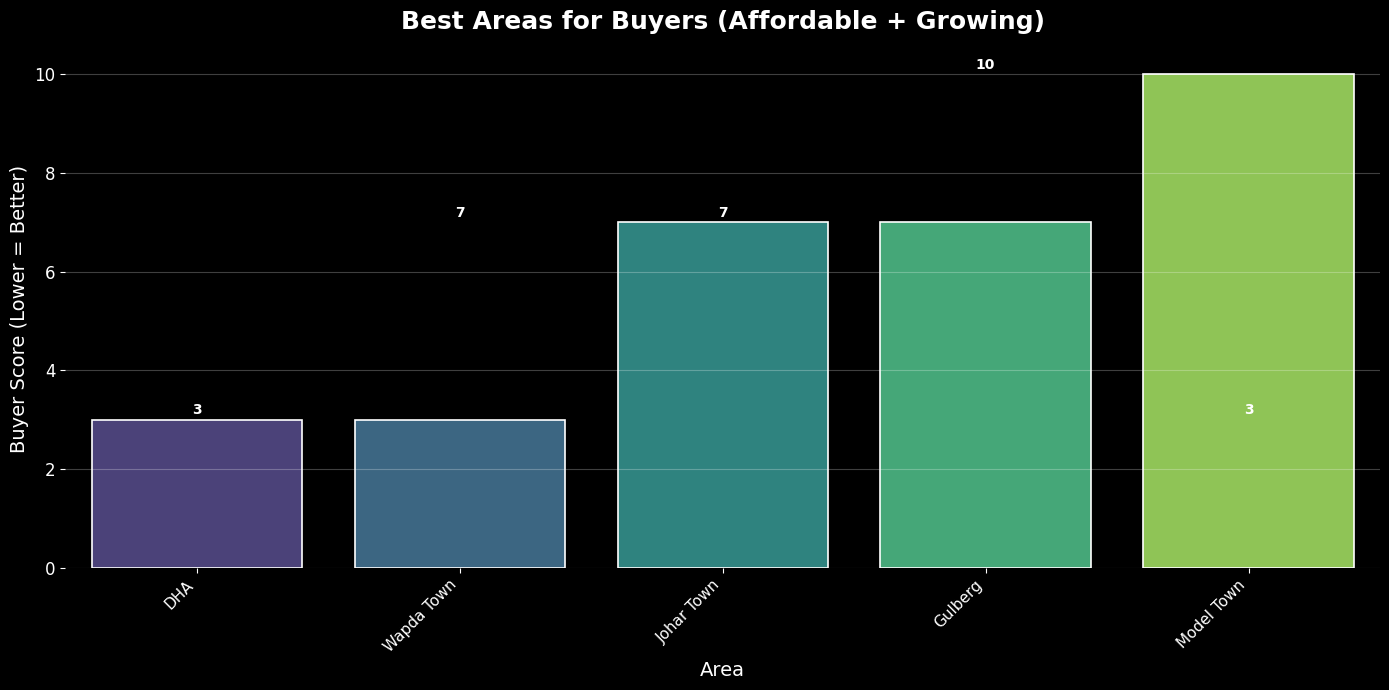

In [52]:
area_invest["Affordability_Rank"] = area_invest["Median_Price_per_sqm"].rank()
area_invest["Growth_Rank"] = area_invest["Growth_Slope"].rank(ascending=False)

area_invest["Buyer_Score"] = area_invest["Affordability_Rank"] + area_invest["Growth_Rank"]

# Ensure dark background
plt.style.use("dark_background")

# Sort the data
area_invest_sorted = area_invest.sort_values("Buyer_Score")

plt.figure(figsize=(14, 7))

# Bar plot
sns.barplot(
    data=area_invest_sorted,
    x="Area",
    y="Buyer_Score",
    palette="viridis",
    edgecolor="white",
    linewidth=1.2
)

# Add value labels on bars
for idx, row in area_invest_sorted.iterrows():
    plt.text(
        idx,
        row["Buyer_Score"] + 0.05,
        f"{row['Buyer_Score']:.0f}",
        ha="center",
        va="bottom",
        color="white",
        fontweight="bold",
        fontsize=10
    )

# Title & Labels
plt.title("Best Areas for Buyers (Affordable + Growing)", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Area", fontsize=14)
plt.ylabel("Buyer Score (Lower = Better)", fontsize=14)

# Style tweaks
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=12)
plt.grid(axis="y", alpha=0.25)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

### **🏗️ 3. Developers: Most Demanded Size & Bedroom Combo**

We find which size range + bedroom count appears most often (high demand).

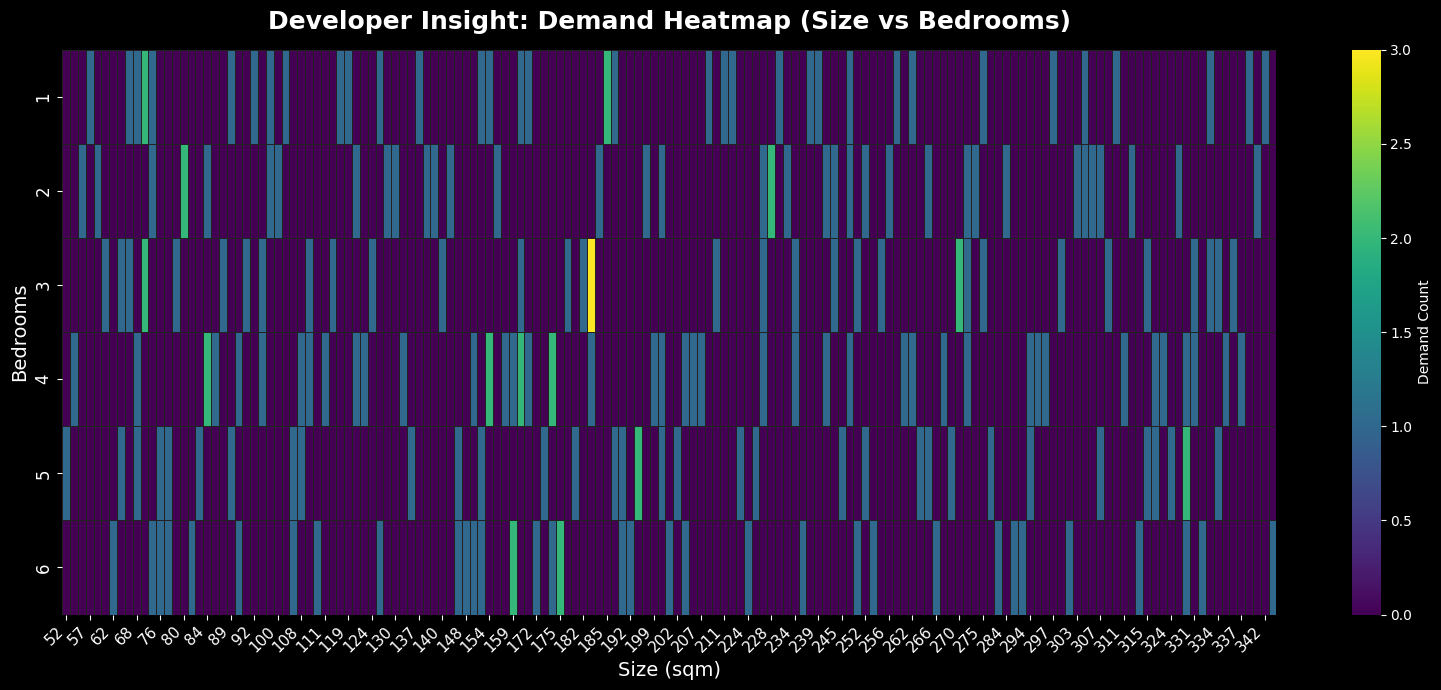

In [53]:
# demand metric
demand = (
    df.groupby(["Size_sqm", "Bedrooms"])
    .size()
    .reset_index(name="Count")
)

# Create pivot table for heatmap
demand_pivot = demand.pivot_table(
    index="Bedrooms",
    columns="Size_sqm",
    values="Count",
    fill_value=0
)

plt.figure(figsize=(16, 7))
plt.style.use("dark_background")

# Plot heatmap
sns.heatmap(
    demand_pivot,
    cmap="viridis",
    linewidths=0.5,
    linecolor="#222222",
    cbar_kws={"label": "Demand Count"},
    annot=False
)

# Title & Labels
plt.title("Developer Insight: Demand Heatmap (Size vs Bedrooms)", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Size (sqm)", fontsize=14)
plt.ylabel("Bedrooms", fontsize=14)

# Styling
plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

---

## **Thank You**

Thank you for exploring this Lahore House Price EDA.  
If you found this analysis useful, feel free to, **comment**, or **follow** for more data-driven projects.

If you have any suggestions or want deeper insights (such as predictive modeling or dashboarding), feel free to reach out.  
Happy analyzing! 📊✨